# Preset

In [135]:
#preset1 - 패키지 opt1 - 구글드라이브에 설치하기
import os, sys
from google.colab import drive

#preset1 -  Colab Notebooks 안에 .env 폴더에 패키지 저장 ( 심볼링 링크가 작동 안된다. )
"""
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/_ColabNotebooks/.env', my_path) # 기존 path를 바꿔치기
sys.path.insert(0, my_path)
"""
#preset1 -  Dependency - 위 preinstall 작업을 안하면, 세션 할당시 매번 install
"""
!pip install --target=$my_path finance_datareader
"""

#preset1 - 패키지 opt2 - 매번 설치하기

# !pip install finance_datareader

#preset -  my_data있는 드라이브 마운트
drive.mount('/content/drive')
prefix_path = "/content/drive/My Drive/_ColabNotebooks/"


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#preset - 주피터 노트북 여러줄 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#preset - pandas
pd.set_option("display.float_format",lambda x: '%.3f'%x) # 소수점 6자리 > 3자리만 보여달라
pd.set_option("max_columns",None) # 컬럼을 ... 으로 요약하지 마라 ( row는 요약되어있다.)
# pd.DataFrame(np.random.randn(1000,300))

#preset - matplotlib
# 매번 시각화가 inline으로 나오도록.
%matplotlib inline

"\ndrive.mount('/content/drive')\nmy_path = '/content/notebooks'\nos.symlink('/content/drive/My Drive/_ColabNotebooks/.env', my_path) # 기존 path를 바꿔치기\nsys.path.insert(0, my_path)\n"

'\n!pip install --target=$my_path finance_datareader\n'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Note
- 데이터 출처 : 유료 데이터 밴더, 증권사 API, 크롤링
- 한계 1. 데이터의 클리닝, 유효성 검증, nan 처리 반드시 필요
* 존재하지 않은 데이터를 다른 데이터로 대처함
* 전략짜는것 보다 더 어려운것이 깨끗한 데이터를 준비하는것이다.  
가비지 인 가비지 아웃
- 한계 2. 분기별로 재무재표가 나오는 시기는 회사마다 다르다.  (가용성 availablity)


# Load data

- 데이터 출처: 증권사 API, N사 금융, 금투협, 유료 데이터 벤더
- Section2: 파일 읽는 법, EDA

In [136]:
# 코드를 돌릴 때 warning이 안나오게 하기
import warnings
warnings.filterwarnings('ignore')

In [137]:
# 영상에서는 fin_statement_2005_2017.csv이지만(데이터 문제가 있는 파일), 
# 해당 데이터에서 문제를 발견하여, fin_statement_new.csv라는 데이터(2006 ~ )로 대체되었습니다
df = pd.read_csv(prefix_path+"my_data/fin_statement_new.csv")
df.head()

Code   Name  결산월       상장일              시가총액            유통시가총액  \
0  A000020   동화약품   12  19760324  113122453500.000   65520525067.000   
1  A000040  KR모터스   12  19760525  144125742600.000  111855988832.000   
2  A000050     경방   12  19560303  275600000000.000  180269960000.000   
3  A000070  삼양홀딩스   12  19681227  602432236800.000  281576827480.000   
4  A000100   유한양행   12  19621101 1382097577000.000 1018467704491.000   

   P/E(Adj., FY End)  P/B(Adj., FY End)  P/S(Adj., FY End)  \
0             11.230              0.550              0.560   
1             97.070              1.440              0.820   
2            426.230              0.860              2.010   
3              8.360              0.570              0.530   
4             25.280              2.670              4.070   

   P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT  DPS(보통주, 현금+주식, 연간)  year   수정주가  \
0                 4.390      3.480    4.390              600.000  2006   6460   
1                -7.780     16.840   40.670                0.000  2006   1098   
2                 5.780     15.340   20.660                0.000  2006  10339   
3                11.160      4.600    6.210             1050.000  2006  63563   
4               -27.990     15.720   17.160             1000.000  2006  24911   

      ROA        비유동부채          자산총계  
0   3.810 11961630.000 195293494.000  
1 -21.980 28190608.000  81250312.000  
2  -1.800 17344611.000 515345506.000  
3   5.490 60878366.000 973804019.000  
4   7.530 95212024.000 746417156.000

In [138]:
# "12개월전대비수익률(현금배당포함)" 컬럼은 미리 제거하여 파일을 업로드했습니다
df = df.drop(["상장일"], axis=1)

In [139]:
df = df.rename(columns={
    "DPS(보통주, 현금+주식, 연간)": "DPS",
    "P/E(Adj., FY End)": "PER",
    "P/B(Adj., FY End)": "PBR",
    "P/S(Adj., FY End)": "PSR",
})

In [140]:
# 새로 올린 데이터는 2005가 아닌 2006부터 데이터가 존재합니다.
df.groupby(['year'])['Name'].count() 
# 해가 갈 수록 상장되는 주식이 늘어난다. - X
# 기업 명이 바뀌는 경우가 있다. 코드명이 바뀌는 경우도 있다.
# m&a 인 경우 

year
2006    1479
2007    1538
2008    1606
2009    1636
2010    1623
2011    1634
2012    1653
2013    1643
2014    1655
2015    1692
2016    1771
2017    1838
Name: Name, dtype: int64

In [141]:
df.groupby(['Name'])['year'].count()
 # 12면 꾸준하게 있다, 아니라면 상폐 or 상장

Name
3S        12
3SOFT      4
3노드디지탈     6
AD모터스      7
AJS        9
          ..
흥국         8
흥국에프엔비     2
흥아해운      12
희림        12
희훈디앤지      4
Name: year, Length: 2241, dtype: int64

In [142]:
# 년도별로 묶고 Name의 유니크와, 년도별로 묶고 Code의 유니크가 같은지 갸늠해서 본다.
# 중복된 이름과 코드가 있다면 매칭이 안될것이다.
# 
df.groupby(['year'])['Name'].nunique()

year
2006    1479
2007    1538
2008    1606
2009    1636
2010    1623
2011    1634
2012    1653
2013    1643
2014    1655
2015    1692
2016    1771
2017    1838
Name: Name, dtype: int64

In [143]:
df.groupby(['year'])['Code'].nunique()

year
2006    1479
2007    1538
2008    1606
2009    1636
2010    1623
2011    1634
2012    1653
2013    1643
2014    1655
2015    1692
2016    1771
2017    1838
Name: Code, dtype: int64

In [144]:
# code or name의 중복 체킹 방법1
df.groupby(['year'])['Name'].nunique().equals(df.groupby(['year'])['Code'].nunique())

True

In [145]:
# code or name의 중복 체킹 방법2
df.groupby(['year', 'Name'])['Code'].nunique()
# 1번 방법은 갯수로만 따지므로 정확하지 않다.
# year,name으로 그룹 후 code의 유니크를 보자. 
# 같은 이름으로 두개의 코드가 존재한다면 2가 나올 것이다.

year  Name  
2006  3S        1
      3SOFT     1
      AD모터스     1
      AJS       1
      AK홀딩스     1
               ..
2017  흥구석유      1
      흥국        1
      흥국에프엔비    1
      흥아해운      1
      희림        1
Name: Code, Length: 19768, dtype: int64

In [146]:
# 위 데이터는 시리즈 > 또 유니크 > 1만 나오는지 보자.
df.groupby(['year', 'Name'])['Code'].nunique().nunique() # 또 유니크를 날려서 1만 있는지

# 이렇게 간략한 EDA 를 했다. 더 깊은 EDA  를 하는것이 맞긴하다.

1

# yearly returns

In [147]:
df[df['Name'] == '동화약품']
# PBR 등이 매년 같은지 등 데이터의 이상 유무를 확인할것!

Code  Name  결산월             시가총액           유통시가총액     PER   PBR  \
0      A000020  동화약품   12 113122453500.000  65520525067.000  11.230 0.550   
1479   A000020  동화약품   12 162002526000.000  96942311558.000  18.390 0.920   
3017   A000020  동화약품   12 289370029200.000 176371032797.000  14.630 1.760   
4623   A000020  동화약품   12 234624348000.000 138311053146.000   7.920 1.100   
6259   A000020  동화약품   12 167309505300.000  99833581813.000  31.520 1.010   
7882   A000020  동화약품   12 122898468000.000  75422789812.000  27.230 0.690   
9516   A000020  동화약품   12 125691615000.000  77576864778.000   6.450 0.500   
11169  A000020  동화약품   12 171499225800.000 108061662177.000 128.660 0.740   
12812  A000020  동화약품   12 166192246500.000 105399122730.000 121.180 0.540   
14467  A000020  동화약품   12 248869397700.000 155966451539.000  31.510 0.680   
16159  A000020  동화약품   12 246914194800.000 153259640712.000  40.540 0.980   
17930  A000020  동화약품   12 344953654500.000 213491816770.000   8.640 0.890   

        PSR  P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT     DPS  year   수정주가  \
0     0.560                 4.390      3.480    4.390 600.000  2006   6460   
1479  1.000                12.290      6.720    8.690 700.000  2007  10720   
3017  1.800               -73.530      8.050    9.000 750.000  2008   6180   
4623  1.200                -2.990      5.440    5.940 100.000  2009   7580   
6259  1.460               -53.540      8.250   18.490 100.000  2010   5290   
7882  0.690                27.780      6.650   24.750 100.000  2011   4080   
9516  0.490                 3.120      3.240    5.240  80.000  2012   6040   
11169 0.760                39.780      7.910   19.800  70.000  2013   4390   
12812 0.560                37.970      7.560  279.960  80.000  2014   5570   
14467 0.730                26.460      7.130   26.160  80.000  2015   8140   
16159 1.020                25.060     10.370   33.350 110.000  2016   8120   
17930 0.960               -57.910      3.440    4.600 150.000  2017   9750   

         ROA        비유동부채          자산총계  
0      3.810 11961630.000 195293494.000  
1479   3.950 12398017.000 192629355.000  
3017   4.130 10897247.000 197948382.000  
4623  10.280  8360598.000 220422961.000  
6259  10.720 25682734.000 311472628.000  
7882   2.170  7427668.000 308991731.000  
9516   1.720 27437308.000 324009899.000  
11169  5.330 21947412.000 339431477.000  
12812  0.400 14690149.000 324284672.000  
14467  0.320 15561801.000 316165541.000  
16159  1.570 14432183.000 313073100.000  
17930  1.780 18088060.000 317187030.000

- Section4: `pivot()`

In [148]:
# pivot 새로운 피봇테이블을 구한다.
# 삼전을 선택 - 년도별 수정주가가 나옴 
# 년도별로 종목이 계속 나오기 때문에 피봇이 가능하다.
# 년도별 - 이름별 > 수정주가를 피봇테이블로 보자.
yearly_price_df = df.pivot(index="year", columns="Name", values="수정주가")
yearly_price_df.head()
# 생존 편향 : 상폐 종목 없이 백테스팅을 하면, 생존자들끼리 데이터이므로
# 그들이 살아남기 위해 노력한 수치가 저평가 된다.

Name       3S    3SOFT   3노드디지탈    AD모터스      AJS  AJ네트웍스  AJ렌터카     AK홀딩스  \
year                                                                         
2006  830.000 6530.000      nan 1997.000 1250.000     nan    nan 12960.000   
2007  686.000 5410.000      nan 1600.000 2200.000     nan    nan 26015.000   
2008  524.000  930.000  799.000  244.000  835.000     nan    nan  8859.000   
2009 1163.000    5.000 1770.000  911.000 2820.000     nan    nan 10362.000   
2010 3237.000      nan 1840.000  718.000 1740.000     nan    nan 22039.000   

Name   APS홀딩스  AP시스템  AP우주통신  AP위성  BGF      BHK        BYC   C&S자산관리  \
year                                                                    
2006 2940.000    nan 490.000   nan  nan 2777.000 150000.000 32870.000   
2007 2607.000    nan  15.000   nan  nan 1575.000 210000.000 81308.000   
2008 2566.000    nan     nan   nan  nan  130.000 135500.000 47874.000   
2009 3185.000    nan     nan   nan  nan    5.000 125000.000 29304.000   
2010 5692.000    nan     nan   nan  nan      nan 161000.000 21328.000   

Name     C&우방    C&중공업        CJ    CJ CGV  CJ E&M    CJ대한통운    CJ씨푸드  \
year                                                                    
2006 3450.000 3210.000 56213.000 19411.000     nan 70275.000 1480.000   
2007 5010.000 5100.000 77794.000 11701.000     nan 75750.000 1300.000   
2008  280.000  735.000 37718.000 13787.000     nan 66750.000  540.000   
2009  185.000  180.000 59123.000 19955.000     nan 56700.000 1040.000   
2010      nan      nan 74400.000 25398.000     nan 94200.000 2365.000   

Name    CJ엔터테인      CJ오쇼핑     CJ인터넷     CJ제일제당   CJ프레시웨이  CJ헬로        CL  \
year                                                                       
2006 22300.000 142489.000 24300.000        nan  9830.000   nan 43650.000   
2007       nan  96966.000 16100.000        nan  8400.000   nan 21150.000   
2008       nan  72724.000 12100.000 179000.000  4450.000   nan  2925.000   
2009       nan 143414.000 13800.000 205500.000 14000.000   nan  1900.000   
2010       nan 231000.000 16200.000 217000.000 11700.000   nan    30.000   

Name    CMG제약       CS  CSA 코스믹     CS홀딩스       CT&T     CU전자       DB  \
year                                                                     
2006 5842.000 7240.000      nan 27267.000 138368.000 1853.000 1023.000   
2007 5144.000 4510.000 3530.000 37071.000  61619.000 1548.000 1388.000   
2008 1008.000 1835.000 3109.000 24772.000   5953.000  669.000  646.000   
2009 1315.000 3430.000 2863.000 39450.000   4762.000 1033.000 1249.000   
2010  713.000 7050.000 2417.000 64200.000   9950.000  730.000 1809.000   

Name     DB라이텍     DB하이텍       DMS    DRB동일  DSR    DSR제강         E1  \
year                                                                   
2006  1062.000 20200.000  7590.000 1101.000  nan 1220.000  41950.000   
2007 12461.000  9640.000 10350.000 1159.000  nan 2610.000 130000.000   
2008 10364.000  3780.000  6000.000  653.000  nan 2135.000  69900.000   
2009  8628.000  7070.000  7730.000 3574.000  nan 4640.000  67800.000   
2010  7710.000 10800.000 10500.000 2921.000  nan 3915.000  54700.000   

Name        EG      EMW      F&F    FnC코오롱      GBS  GH신소재       GKL  \
year                                                                   
2006 10506.000 2708.000 4810.000 17600.000 8363.000    nan       nan   
2007 12351.000 1545.000 4185.000 24750.000 9041.000    nan       nan   
2008 10300.000  749.000 3000.000 10550.000  555.000    nan       nan   
2009 16600.000 3484.000 3175.000 12950.000    5.000    nan       nan   
2010 38000.000 3003.000 5560.000       nan      nan    nan 20650.000   

Name      GK파워   GMR 머티리얼즈  GRT        GS      GST       GS건설     GS글로벌  \
year                                                                      
2006 34721.000 1071842.000  nan 30100.000 3017.000  76842.000  4496.000   
2007 11222.000  968710.000  nan 58100.000 3260.000 144253.000  4159.000   
2008  3154.000  165748.000  nan 26900.000 1020.000  53632.000  3363

- rtn 구하기 (수익율)
    - $p_{n+1}\over{p_{n}}$ - 1
- 수익률 공식 : ( P[n+1] / P[n] ) - 1  
 ( 어제 나누기 오늘 비율에서 1을 뺀것 )
- pct_change 라는 함수로 구현해 두었다.

In [149]:
yearly_price_df[['3S','3SOFT']].head() # 원본 데이터 

Name       3S    3SOFT
year                  
2006  830.000 6530.000
2007  686.000 5410.000
2008  524.000  930.000
2009 1163.000    5.000
2010 3237.000      nan

In [150]:
yearly_price_df[['3S','3SOFT']].shift().head() 
# row가 한칸씩 밀린다. 밀린곳은 naa으로 채워짐

Name       3S    3SOFT
year                  
2006      nan      nan
2007  830.000 6530.000
2008  686.000 5410.000
2009  524.000  930.000
2010 1163.000    5.000

In [151]:
yearly_price_df[['3S','3SOFT']]/yearly_price_df[['3S','3SOFT']].shift() 

Name    3S  3SOFT
year             
2006   nan    nan
2007 0.827  0.828
2008 0.764  0.172
2009 2.219  0.005
2010 2.783    nan
2011 7.677    nan
2012 0.288    nan
2013 0.620    nan
2014 0.539    nan
2015 0.975    nan
2016 1.193    nan
2017 0.662    nan

In [134]:
'''
# 직접 위 처럼 쉬프트후 나눠주어도 되는데, 역시 판다스에 이미 기능이 있다.
# pct_change는 fill_method='pad'기본 : nan이 나오면 최근값으로 매꾼다
# 그러기에 nan이 있음에도 그전 값과 연산이 되어 0이 나오게 된다. > 원치 않음 
# 실제 존재하는 주식인데 수익율이 0인 경우랑 헷갈린다.
'''
yearly_price_df.pct_change( fill_method='pad')

"\n# 직접 위 처럼 쉬프트후 나눠주어도 되는데, 역시 판다스에 이미 기능이 있다.\n# pct_change는 fill_method='pad'기본 : nan이 나오면 최근값으로\n 매꾼다\n# 그러기에 nan이 있음에도 그전 값과 연산이 되어 0이 나오게 된다. > 원치 않음 \n# 실제 존재하는 주식인데 수익율이 0인 경우랑 헷갈린다.\n"

Name     3S  3SOFT  3노드디지탈  AD모터스    AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                            
2006    nan    nan     nan    nan    nan     nan    nan    nan     nan    nan   
2007 -0.173 -0.172     nan -0.199  0.760     nan    nan  1.007  -0.113    nan   
2008 -0.236 -0.828     nan -0.848 -0.620     nan    nan -0.659  -0.016    nan   
2009  1.219 -0.995   1.215  2.734  2.377     nan    nan  0.170   0.241    nan   
2010  1.783  0.000   0.040 -0.212 -0.383     nan    nan  1.127   0.787    nan   
2011  6.677  0.000  -0.504 -0.458 -0.353     nan    nan  0.154   0.702    nan   
2012 -0.712  0.000  -0.052 -0.823 -0.208     nan    nan -0.154  -0.440    nan   
2013 -0.380  0.000   0.387  0.000 -0.304     nan    nan  0.845   0.354    nan   
2014 -0.461  0.000   0.000  0.000 -0.947     nan  0.320  1.021  -0.381    nan   
2015 -0.025  0.000   0.000  0.000  0.000     nan -0.270 -0.212   1.131    nan   
2016  0.193  0.000   0.000  0.000  0.000     nan -0.298 -0.114   1.296    nan   
2017 -0.338  0.000   0.000  0.000  0.000   0.072  0.187  0.223  -0.662    nan   

Name  AP우주통신   AP위성    BGF    BHK    BYC  C&S자산관리   C&우방  C&중공업     CJ  \
year                                                                     
2006     nan    nan    nan    nan    nan      nan    nan    nan    nan   
2007  -0.969    nan    nan -0.433  0.400    1.474  0.452  0.589  0.384   
2008   0.000    nan    nan -0.917 -0.355   -0.411 -0.944 -0.856 -0.515   
2009   0.000    nan    nan -0.962 -0.077   -0.388 -0.339 -0.755  0.568   
2010   0.000    nan    nan  0.000  0.288   -0.272  0.000  0.000  0.258   
2011   0.000    nan    nan  0.000 -0.043   -0.161  0.000  0.000 -0.024   
2012   0.000    nan    nan  0.000  0.195    0.637  0.000  0.000  0.539   
2013   0.000    nan    nan  0.000  0.022   -0.246  0.000  0.000 -0.017   
2014   0.000    nan    nan  0.000  0.391   -0.210  0.000  0.000  0.339   
2015   0.000    nan    nan  0.000  0.757    1.272  0.000  0.000  0.609   
2016   0.000    nan -0.047  0.000 -0.136   -0.507  0.000  0.000 -0.255   
2017   0.000 -0.028 -0.638  0.000 -0.229   -0.662  0.000  0.000 -0.029   

Name  CJ CGV  CJ E&M  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  \
year                                                                         
2006     nan     nan     nan    nan     nan    nan    nan     nan      nan   
2007  -0.397     nan   0.078 -0.122   0.000 -0.319 -0.337     nan   -0.145   
2008   0.178     nan  -0.119 -0.585   0.000 -0.250 -0.248     nan   -0.470   
2009   0.447     nan  -0.151  0.926   0.000  0.972  0.140   0.148    2.146   
2010   0.273     nan   0.661  1.274   0.000  0.611  0.174   0.056   -0.164   
2011  -0.048     nan  -0.204  0.142   0.000  0.117  0.000   0.334    1.137   
2012   0.206  -0.125   0.340  0.117   0.000  0.074  0.000   0.228    0.468   
2013   0.353   0.151  -0.005 -0.172   0.000  0.498  0.000  -0.221   -0.202   
2014   0.241   0.252   0.960 -0.008   0.000 -0.373  0.000   0.106    0.573   
2015   1.333   1.110  -0.026  0.410   0.000 -0.267  0.000   0.232    0.803   
2016  -0.441  -0.120  -0.063 -0.006   0.000 -0.146  0.000  -0.053   -0.531   
2017   0.054   0.378  -0.218 -0.171   0.000  0.418  0.000   0.024    0.021   

Name   CJ헬로     CL  CMG제약     CS  CSA 코스믹  CS홀딩스   CT&T   CU전자     DB  DB라이텍  \
year                                                                           
2006    nan    nan    nan    nan      nan    nan    nan    nan    nan    nan   
2007    nan -0.515 -0.119 -0.377      nan  0.360 -0.555 -0.165  0.357 10.734   
2008    nan -0.862 -0.804 -0.593   -0.119 -0.332 -0.903 -0.568 -0.535 -0.168   
2009    nan -0.350  0.305  0.869   -0.079  0.593 -0.200  0.544  0.933 -0.168   
2010    nan -0.984 -0.458  1.055   -0.156  0.627  1.089 -0.293  0.448 -0.106   
2011    nan  0.000 -0.008  0.271   -0.026 -0.449 -0.962 -0.600 -0.522 -0.666   
2012    nan  0.000  0.694 -0.504   -0.077 -0.049 -0.889  0.884 -0.281 -0.278   
2013    nan  0.

In [152]:
# pct_change의 fill_method를 nan으로 설정해서 nan을 유지하자.

# 2009년에 수익률 / 2008 년 수익률 ( 얘가 밀린 DF ) -1  이므로 수익률 결과값은 2009년에 넣어진다.
# 아래의 데이터 해석은 , [2009][3노드 디지탈] = 2008년에 들고있으면 해당 종목의 수익률은 1.215프로이다.
yearly_rtn_df = yearly_price_df.pct_change(fill_method=None)
yearly_rtn_df

Name     3S  3SOFT  3노드디지탈  AD모터스    AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                            
2006    nan    nan     nan    nan    nan     nan    nan    nan     nan    nan   
2007 -0.173 -0.172     nan -0.199  0.760     nan    nan  1.007  -0.113    nan   
2008 -0.236 -0.828     nan -0.848 -0.620     nan    nan -0.659  -0.016    nan   
2009  1.219 -0.995   1.215  2.734  2.377     nan    nan  0.170   0.241    nan   
2010  1.783    nan   0.040 -0.212 -0.383     nan    nan  1.127   0.787    nan   
2011  6.677    nan  -0.504 -0.458 -0.353     nan    nan  0.154   0.702    nan   
2012 -0.712    nan  -0.052 -0.823 -0.208     nan    nan -0.154  -0.440    nan   
2013 -0.380    nan   0.387    nan -0.304     nan    nan  0.845   0.354    nan   
2014 -0.461    nan     nan    nan -0.947     nan  0.320  1.021  -0.381    nan   
2015 -0.025    nan     nan    nan    nan     nan -0.270 -0.212   1.131    nan   
2016  0.193    nan     nan    nan    nan     nan -0.298 -0.114   1.296    nan   
2017 -0.338    nan     nan    nan    nan   0.072  0.187  0.223  -0.662    nan   

Name  AP우주통신   AP위성    BGF    BHK    BYC  C&S자산관리   C&우방  C&중공업     CJ  \
year                                                                     
2006     nan    nan    nan    nan    nan      nan    nan    nan    nan   
2007  -0.969    nan    nan -0.433  0.400    1.474  0.452  0.589  0.384   
2008     nan    nan    nan -0.917 -0.355   -0.411 -0.944 -0.856 -0.515   
2009     nan    nan    nan -0.962 -0.077   -0.388 -0.339 -0.755  0.568   
2010     nan    nan    nan    nan  0.288   -0.272    nan    nan  0.258   
2011     nan    nan    nan    nan -0.043   -0.161    nan    nan -0.024   
2012     nan    nan    nan    nan  0.195    0.637    nan    nan  0.539   
2013     nan    nan    nan    nan  0.022   -0.246    nan    nan -0.017   
2014     nan    nan    nan    nan  0.391   -0.210    nan    nan  0.339   
2015     nan    nan    nan    nan  0.757    1.272    nan    nan  0.609   
2016     nan    nan -0.047    nan -0.136   -0.507    nan    nan -0.255   
2017     nan -0.028 -0.638    nan -0.229   -0.662    nan    nan -0.029   

Name  CJ CGV  CJ E&M  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  \
year                                                                         
2006     nan     nan     nan    nan     nan    nan    nan     nan      nan   
2007  -0.397     nan   0.078 -0.122     nan -0.319 -0.337     nan   -0.145   
2008   0.178     nan  -0.119 -0.585     nan -0.250 -0.248     nan   -0.470   
2009   0.447     nan  -0.151  0.926     nan  0.972  0.140   0.148    2.146   
2010   0.273     nan   0.661  1.274     nan  0.611  0.174   0.056   -0.164   
2011  -0.048     nan  -0.204  0.142     nan  0.117    nan   0.334    1.137   
2012   0.206  -0.125   0.340  0.117     nan  0.074    nan   0.228    0.468   
2013   0.353   0.151  -0.005 -0.172     nan  0.498    nan  -0.221   -0.202   
2014   0.241   0.252   0.960 -0.008     nan -0.373    nan   0.106    0.573   
2015   1.333   1.110  -0.026  0.410     nan -0.267    nan   0.232    0.803   
2016  -0.441  -0.120  -0.063 -0.006     nan -0.146    nan  -0.053   -0.531   
2017   0.054   0.378  -0.218 -0.171     nan  0.418    nan   0.024    0.021   

Name   CJ헬로     CL  CMG제약     CS  CSA 코스믹  CS홀딩스   CT&T   CU전자     DB  DB라이텍  \
year                                                                           
2006    nan    nan    nan    nan      nan    nan    nan    nan    nan    nan   
2007    nan -0.515 -0.119 -0.377      nan  0.360 -0.555 -0.165  0.357 10.734   
2008    nan -0.862 -0.804 -0.593   -0.119 -0.332 -0.903 -0.568 -0.535 -0.168   
2009    nan -0.350  0.305  0.869   -0.079  0.593 -0.200  0.544  0.933 -0.168   
2010    nan -0.984 -0.458  1.055   -0.156  0.627  1.089 -0.293  0.448 -0.106   
2011    nan    nan -0.008  0.271   -0.026 -0.449 -0.962 -0.600 -0.522 -0.666   
2012    nan    nan  0.694 -0.504   -0.077 -0.049 -0.889  0.884 -0.281 -0.278   
2013    nan    

In [153]:
# 1. year_price_df.pct_change() == year_price_df / year_price_df.shift() - 1
# 2. `shift(-1)`을 하는 이유? 
#    - 데이터를 "xx년도에서 1년동안 들고있었더니, xx만큼 수익이 났다"로 해석하고 싶기 때문
yearly_rtn_df = yearly_price_df.pct_change(fill_method=None).shift(-1)
yearly_rtn_df
# 아래의 데이터 해석은 , [2009][3노드 디지탈] = 2009년에 들고있으면 해당 종목의 수익률은 0.04프로이다.
# ( 2010년의 수익율까지 미래를 보는것이네! )

Name     3S  3SOFT  3노드디지탈  AD모터스    AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                            
2006 -0.173 -0.172     nan -0.199  0.760     nan    nan  1.007  -0.113    nan   
2007 -0.236 -0.828     nan -0.848 -0.620     nan    nan -0.659  -0.016    nan   
2008  1.219 -0.995   1.215  2.734  2.377     nan    nan  0.170   0.241    nan   
2009  1.783    nan   0.040 -0.212 -0.383     nan    nan  1.127   0.787    nan   
2010  6.677    nan  -0.504 -0.458 -0.353     nan    nan  0.154   0.702    nan   
2011 -0.712    nan  -0.052 -0.823 -0.208     nan    nan -0.154  -0.440    nan   
2012 -0.380    nan   0.387    nan -0.304     nan    nan  0.845   0.354    nan   
2013 -0.461    nan     nan    nan -0.947     nan  0.320  1.021  -0.381    nan   
2014 -0.025    nan     nan    nan    nan     nan -0.270 -0.212   1.131    nan   
2015  0.193    nan     nan    nan    nan     nan -0.298 -0.114   1.296    nan   
2016 -0.338    nan     nan    nan    nan   0.072  0.187  0.223  -0.662    nan   
2017    nan    nan     nan    nan    nan     nan    nan    nan     nan    nan   

Name  AP우주통신   AP위성    BGF    BHK    BYC  C&S자산관리   C&우방  C&중공업     CJ  \
year                                                                     
2006  -0.969    nan    nan -0.433  0.400    1.474  0.452  0.589  0.384   
2007     nan    nan    nan -0.917 -0.355   -0.411 -0.944 -0.856 -0.515   
2008     nan    nan    nan -0.962 -0.077   -0.388 -0.339 -0.755  0.568   
2009     nan    nan    nan    nan  0.288   -0.272    nan    nan  0.258   
2010     nan    nan    nan    nan -0.043   -0.161    nan    nan -0.024   
2011     nan    nan    nan    nan  0.195    0.637    nan    nan  0.539   
2012     nan    nan    nan    nan  0.022   -0.246    nan    nan -0.017   
2013     nan    nan    nan    nan  0.391   -0.210    nan    nan  0.339   
2014     nan    nan    nan    nan  0.757    1.272    nan    nan  0.609   
2015     nan    nan -0.047    nan -0.136   -0.507    nan    nan -0.255   
2016     nan -0.028 -0.638    nan -0.229   -0.662    nan    nan -0.029   
2017     nan    nan    nan    nan    nan      nan    nan    nan    nan   

Name  CJ CGV  CJ E&M  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  \
year                                                                         
2006  -0.397     nan   0.078 -0.122     nan -0.319 -0.337     nan   -0.145   
2007   0.178     nan  -0.119 -0.585     nan -0.250 -0.248     nan   -0.470   
2008   0.447     nan  -0.151  0.926     nan  0.972  0.140   0.148    2.146   
2009   0.273     nan   0.661  1.274     nan  0.611  0.174   0.056   -0.164   
2010  -0.048     nan  -0.204  0.142     nan  0.117    nan   0.334    1.137   
2011   0.206  -0.125   0.340  0.117     nan  0.074    nan   0.228    0.468   
2012   0.353   0.151  -0.005 -0.172     nan  0.498    nan  -0.221   -0.202   
2013   0.241   0.252   0.960 -0.008     nan -0.373    nan   0.106    0.573   
2014   1.333   1.110  -0.026  0.410     nan -0.267    nan   0.232    0.803   
2015  -0.441  -0.120  -0.063 -0.006     nan -0.146    nan  -0.053   -0.531   
2016   0.054   0.378  -0.218 -0.171     nan  0.418    nan   0.024    0.021   
2017     nan     nan     nan    nan     nan    nan    nan     nan      nan   

Name   CJ헬로     CL  CMG제약     CS  CSA 코스믹  CS홀딩스   CT&T   CU전자     DB  DB라이텍  \
year                                                                           
2006    nan -0.515 -0.119 -0.377      nan  0.360 -0.555 -0.165  0.357 10.734   
2007    nan -0.862 -0.804 -0.593   -0.119 -0.332 -0.903 -0.568 -0.535 -0.168   
2008    nan -0.350  0.305  0.869   -0.079  0.593 -0.200  0.544  0.933 -0.168   
2009    nan -0.984 -0.458  1.055   -0.156  0.627  1.089 -0.293  0.448 -0.106   
2010    nan    nan -0.008  0.271   -0.026 -0.449 -0.962 -0.600 -0.522 -0.666   
2011    nan    nan  0.694 -0.504   -0.077 -0.049 -0.889  0.884 -0.281 -0.278   
2012    nan    nan -0.300 -0.437   -0.413  0.074    nan -0.616 -0.285  0.172   
2013 -0.493    

- 상장폐지 종목은 어떻게 처리가 되나?

In [154]:
# 2013년에 nan 데이터의 해석
# 1월에 상폐 되었다. ... 12월에 상폐 되었다. 뭐든 nan
# 6월에 상폐되고 그 데이터를 남겨도 데이터 align이 맞지 않은것

# 만약 2013 년 6월에 상폐되어서 데이터를 남겼다면 align이 안된것이다.
yearly_price_df['AD모터스']
#2013년에 상폐를 모른다고 가정해야함 ( look ahead bias )

year
2006   1997.000
2007   1600.000
2008    244.000
2009    911.000
2010    718.000
2011    389.000
2012     69.000
2013        nan
2014        nan
2015        nan
2016        nan
2017        nan
Name: AD모터스, dtype: float64

In [155]:
yearly_price_df['AD모터스'].pct_change(fill_method=None).shift(-1)
# 아래의 해석 : 2011 년에 사면 년말에 -0.823 손해다
# 2012년에 살순 있다. 하지만 상폐다.( 언제인지는 모른다. )
# 2013년에 사지도 못한다.

year
2006   -0.199
2007   -0.848
2008    2.734
2009   -0.212
2010   -0.458
2011   -0.823
2012      nan
2013      nan
2014      nan
2015      nan
2016      nan
2017      nan
Name: AD모터스, dtype: float64

- 2011/12에 매수했으면, 1년의 rtn value는은 보장됨.
- 2012/12에 매수했으면,
    - 2013년 1월에 상장폐지 되었을 수도 있고, 2013년 12월(초)에 되었을 수도 있기 때문에 => rtn이 nan처리됨

요약 : 전처리 및 수익율 함수
--- 

# Single Indicator(지표) backtesting

- 백테스팅 종류
1. 백터라이즈 백테스팅  
- 병렬연산 특성을 이용
- 수백수천개의 데이터를 빠르게 처리해서 장점이 있음

2. 이벤트 라이즈드 백테스팅  
- 특정 이벤트마다 데이터를 받아 백테스팅을 하는것  
- 주식시장의 로직을 그대로 반영해 실전에 적합  
- 최소한의 코드 수정이 필요  

- Section1: `reset_index()`
- Section2: boolean selection, DataFrame arithmetic operation, dtype변환
- Section3: `groupby()` & `aggregation`
- Section4: `join()`, `pivot()`
- Section5: visualization

## DataFrame(matrix) Multiplication 복습

In [156]:
# idx,col align이 다 맞는경우
a = pd.DataFrame([[1,2], [3, np.nan,], [5,6]], columns=["a", "b"])
b = pd.DataFrame([[1,2], [3, 4,], [5,6]], columns=["a", "b"])*10
a
b

a     b
0  1 2.000
1  3   nan
2  5 6.000

a   b
0  10  20
1  30  40
2  50  60

In [157]:
a * b

a       b
0   10  40.000
1   90     nan
2  250 360.000

In [158]:
# idx,col align이 안맞는 경우 - nan 생성
a = pd.DataFrame([[1,2], [3, np.nan,], [5,6]], columns=["a", "b"])
b = pd.DataFrame([[1,2,3], [3, 4,5], [5,6,7]], columns=["c", "b", "d"])*10
a
b

a     b
0  1 2.000
1  3   nan
2  5 6.000

c   b   d
0  10  20  30
1  30  40  50
2  50  60  70

In [159]:
a * b

a       b   c   d
0 nan  40.000 nan nan
1 nan     nan nan nan
2 nan 360.000 nan nan

In [160]:
return_df = pd.DataFrame(
    [
        [np.nan,  np.nan, 2     ],
        [3,       np.nan, 3     ],
        [5,       6,      np.nan], 
    ],
    columns=["삼성", "현대", "SK"]
)
asset_on_df = pd.DataFrame(
    [
        [0, 1],
        [0, 1],
        [1, 0], 
    ],
    columns=["삼성", "SK"]
)
return_df # 날짜-수익률 이라 생각
asset_on_df # 선택한다 안한다- 날짜별 선택여부

삼성    현대    SK
0   nan   nan 2.000
1 3.000   nan 3.000
2 5.000 6.000   nan

삼성  SK
0   0   1
1   0   1
2   1   0

In [161]:
return_df * asset_on_df

SK    삼성  현대
0 2.000   nan nan
1 3.000 0.000 nan
2   nan 5.000 nan

In [162]:
(return_df * asset_on_df).mean(axis=1)
# 1번째 날의 삼성은 0 으로 되어 있어서 평균값에 영향을 준다.

0   2.000
1   1.500
2   5.000
dtype: float64

In [163]:
# 해결책 - 0 을 nan으로 변경
asset_on_df = asset_on_df.replace(0, np.nan)

In [164]:
return_df * asset_on_df

SK    삼성  현대
0 2.000   nan nan
1 3.000   nan nan
2   nan 5.000 nan

In [165]:
# "동일가중" 방식의 투자인 경우, 포트폴리오 평균수익률 구하는 방법
(return_df * asset_on_df).mean(axis=1)
# nan이 집계에 제외, 원하던 결과임.

0   2.000
1   3.000
2   5.000
dtype: float64

## top_n

In [166]:
df.head()

Code   Name  결산월              시가총액            유통시가총액     PER   PBR  \
0  A000020   동화약품   12  113122453500.000   65520525067.000  11.230 0.550   
1  A000040  KR모터스   12  144125742600.000  111855988832.000  97.070 1.440   
2  A000050     경방   12  275600000000.000  180269960000.000 426.230 0.860   
3  A000070  삼양홀딩스   12  602432236800.000  281576827480.000   8.360 0.570   
4  A000100   유한양행   12 1382097577000.000 1018467704491.000  25.280 2.670   

    PSR  P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT      DPS  year   수정주가  \
0 0.560                 4.390      3.480    4.390  600.000  2006   6460   
1 0.820                -7.780     16.840   40.670    0.000  2006   1098   
2 2.010                 5.780     15.340   20.660    0.000  2006  10339   
3 0.530                11.160      4.600    6.210 1050.000  2006  63563   
4 4.070               -27.990     15.720   17.160 1000.000  2006  24911   

      ROA        비유동부채          자산총계  
0   3.810 11961630.000 195293494.000  
1 -21.980 28190608.000  81250312.000  
2  -1.800 17344611.000 515345506.000  
3   5.490 60878366.000 973804019.000  
4   7.530 95212024.000 746417156.000

In [167]:
indicator = "ROA" # 년도별 ROA가 가장 큰 , 가장 작은 종목

In [168]:
top_n = 10

In [169]:
df.groupby(['year'])[indicator].nlargest(top_n)

year       
2006  1079    64.490
      1442    62.610
      1455    58.550
      1402    51.440
      1467    48.400
               ...  
2017  19658   52.050
      19696   48.980
      19730   46.440
      18265   41.830
      19729   39.480
Name: ROA, Length: 120, dtype: float64

In [170]:
df[indicator].isna().sum() # ROA가 1060개나 누락이 되어있다.
# 1. 특정 종목이 ROA 가 높지만 이를 놓칠 수 있다.
# 2. ROA가 ffill 되어있을 수 있다. 엄격한 처리가 중요하다.

1060

In [171]:
# level_1은 레벨1의 원본 인덱스번호 이다.
# nlargest 동작 방식이 그러하다.
top_n_indicator_df = df.groupby(['year'])[indicator].nlargest(top_n).reset_index()
top_n_indicator_df.head()
top_n_indicator_df.tail()

year  level_1    ROA
0  2006     1079 64.490
1  2006     1442 62.610
2  2006     1455 58.550
3  2006     1402 51.440
4  2006     1467 48.400

year  level_1    ROA
115  2017    19658 52.050
116  2017    19696 48.980
117  2017    19730 46.440
118  2017    18265 41.830
119  2017    19729 39.480

In [172]:
# 종목 indexing
top_n_roa_df = df.loc[top_n_indicator_df['level_1']]
top_n_roa_df.head()
# 각 년도별 top10 ROA를 고른 df에서 인덱스만을 가져와서 원래 데이터에서 subset을 구한것임 

Code      Name  결산월             시가총액           유통시가총액    PER   PBR  \
1079  A048870  시너지이노베이션   12 252240105600.000 186001853869.000  0.630 0.180   
1442  A080000      에스엔유   12 177821980000.000 115242157510.000 11.850 3.280   
1455  A082800    루미마이크로   12  59698800000.000  28249472160.000 36.020 2.220   
1402  A075130      플랜티넷   12 127680000000.000 132685056000.000 27.240 5.140   
1467  A084370      유진테크   12  31170176000.000  14724791142.000    nan 0.000   

        PSR  P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT      DPS  year   수정주가  \
1079  0.100                 0.560      7.730    9.240 1050.000  2006  45925   
1442  3.440               -43.050      9.480   10.330   60.000  2006   4217   
1455  2.730               -15.020     14.720   41.420    0.000  2006   1311   
1402 10.070                51.340     21.080   26.370  110.000  2006  16200   
1467    nan                   nan        nan      nan   65.000  2006   1447   

        ROA       비유동부채         자산총계  
1079 64.490  484745.000 97283559.000  
1442 62.610 4739832.000 31210115.000  
1455 58.550 3674557.000 19836533.000  
1402 51.440 1988671.000 26339925.000  
1467 48.400 1324699.000 14297125.000

In [238]:
# 다시 피봇을 통해 중요데이터로 리메이크
indicator_df = top_n_roa_df.pivot(index="year", columns="Name", values="ROA")
indicator_df.head()

Name    DMS  GKL    ISC  KG이니시스  MP한강  NAVER  S&K폴리텍     SY  골프존뉴딘   나노캠텍  \
year                                                                        
2006 45.300  nan    nan     nan   nan    nan     nan    nan    nan    nan   
2007    nan  nan    nan  46.090   nan    nan     nan 34.510    nan 35.540   
2008    nan  nan 47.170     nan   nan    nan  36.670    nan    nan    nan   
2009    nan  nan    nan     nan   nan 41.180     nan    nan    nan    nan   
2010    nan  nan    nan     nan   nan 40.050     nan    nan    nan    nan   

Name  나노트로닉스  내츄럴엔도텍  네이쳐글로벌  넥스트리밍  넥스트바이오홀딩스  넥스트아이   넥스트칩  다믈멀티미디어  더블유게임즈  \
year                                                                            
2006     nan     nan     nan    nan        nan    nan    nan      nan     nan   
2007     nan     nan  42.310    nan     45.110    nan    nan      nan     nan   
2008     nan     nan     nan    nan        nan    nan 39.530   39.340     nan   
2009  38.390     nan     nan    nan     45.910    nan    nan      nan     nan   
2010     nan     nan     nan    nan        nan    nan    nan      nan     nan   

Name  동양  동양네트웍스   디엔에프  디지텍시스템  라이온켐텍  루미마이크로  메지온  모다    모린스  미동앤씨네마  보해양조  \
year                                                                           
2006 nan     nan    nan     nan    nan  58.550  nan nan    nan     nan   nan   
2007 nan     nan    nan     nan    nan     nan  nan nan    nan     nan   nan   
2008 nan     nan 45.310  48.830    nan     nan  nan nan    nan     nan   nan   
2009 nan     nan    nan     nan    nan     nan  nan nan    nan     nan   nan   
2010 nan     nan    nan     nan    nan     nan  nan nan 53.790     nan   nan   

Name  부방    뷰웍스  비아트론  사파이어테크놀로지  삼성바이오로직스   서호전기  선데이토즈  성지건설  성창기업지주  \
year                                                                     
2006 nan    nan   nan        nan       nan    nan    nan   nan     nan   
2007 nan    nan   nan        nan       nan    nan    nan   nan     nan   
2008 nan    nan   nan        nan       nan    nan    nan   nan     nan   
2009 nan 35.490   nan        nan       nan    nan    nan   nan     nan   
2010 nan    nan   nan        nan       nan 41.980    nan   nan     nan   

Name  셀트리온제약  슈프리마에이치큐  슈피겐코리아  시너지이노베이션  신세계  썸에이지    씨모텍  씨엘인터내셔널  씨젠  \
year                                                                      
2006     nan       nan     nan    64.490  nan   nan    nan      nan nan   
2007  36.900       nan     nan       nan  nan   nan    nan   41.620 nan   
2008     nan       nan     nan       nan  nan   nan    nan      nan nan   
2009     nan    36.270     nan       nan  nan   nan 39.120      nan nan   
2010     nan       nan     nan       nan  nan   nan    nan      nan nan   

Name  씨케이에이치  아나패스  아이디스홀딩스  아이디에스  아이즈비전  아트라스BX  앤디포스  에스디생명공학   에스엔유  \
year                                                                      
2006     nan   nan      nan 43.560    nan     nan   nan      nan 62.610   
2007     nan   nan      nan    nan 92.180     nan   nan      nan    nan   
2008     nan   nan      nan    nan    nan     nan   nan      nan    nan   
2009     nan   nan      nan    nan    nan     nan   nan      nan    nan   
2010     nan   nan      nan    nan    nan  39.660   nan      nan    nan   

Name   엔스퍼트  영우디에스피  오성첨단소재  완리    우리넷  우리로  원익  웨이브일렉트로  위메이드  유니테스트   유진테크  \
year                                                                           
2006    nan     nan     nan nan    nan  nan nan      nan   nan    nan 48.400   
2007    nan     nan     nan nan    nan  nan nan      nan   nan 63.830    nan   
2008 73.670     nan     nan nan    nan  nan nan   38.860   nan    nan    nan   
2009    nan     nan  47.080 nan    nan  nan nan      nan   nan    nan    nan   
2010    nan     nan     nan nan 40.670  nan nan      nan   nan    nan    nan   

Name  이노와이어리스  이디디컴퍼니   이미지스   이아이디  인터불스  인터파크홀딩스   인포바인   인포피아  잇츠한불  제닉  \
year                                                                         
2006   46.500     nan    nan    nan   nan  

- 주의: nan 값을 가지고 있는 종목은 아예 고려대상에서 배제됨(물론 agg 함수의 연산특성에 따라 다르기는하나, 대부분의 함수가 nan은 배제시키고 계산함)
- 깜짝 퀴즈
    - 각 row별, nan이 아닌 값이 정확히 top_n개 만큼 인지 확인하는 방법?

In [243]:
# nan의 원소가 아닌것들의 갯수가 m개년*topN 과 동일한지?
# 12개년 * top 10 = 120
indicator_df.notna().astype(int) # ?? 왜
indicator_df.notna().astype(int).sum(axis=1)
print("\n예상 # 12개년 * top 10 = 120")
indicator_df.notna().astype(int).sum(axis=1).sum()

Name  DMS  GKL  ISC  KG이니시스  MP한강  NAVER  S&K폴리텍  SY  골프존뉴딘  나노캠텍  나노트로닉스  \
year                                                                        
2006    1    0    0       0     0      0       0   0      0     0       0   
2007    0    0    0       1     0      0       0   1      0     1       0   
2008    0    0    1       0     0      0       1   0      0     0       0   
2009    0    0    0       0     0      1       0   0      0     0       1   
2010    0    0    0       0     0      1       0   0      0     0       0   
2011    0    0    0       0     0      0       0   0      0     0       0   
2012    0    0    0       0     0      0       0   0      1     0       0   
2013    0    0    0       0     0      0       0   0      0     0       0   
2014    0    1    0       0     0      0       0   0      0     0       0   
2015    0    0    0       0     0      1       0   0      0     0       0   
2016    0    0    0       0     0      0       0   0      0     0       0   
2017    0    0    0       0     1      0       0   0      1     0       0   

Name  내츄럴엔도텍  네이쳐글로벌  넥스트리밍  넥스트바이오홀딩스  넥스트아이  넥스트칩  다믈멀티미디어  더블유게임즈  동양  \
year                                                                       
2006       0       0      0          0      0     0        0       0   0   
2007       0       1      0          1      0     0        0       0   0   
2008       0       0      0          0      0     1        1       0   0   
2009       0       0      0          1      0     0        0       0   0   
2010       0       0      0          0      0     0        0       0   0   
2011       0       0      0          0      0     0        0       0   0   
2012       0       0      1          0      1     0        0       0   0   
2013       0       0      0          0      0     0        0       0   0   
2014       1       0      0          0      0     0        0       0   0   
2015       1       0      0          0      0     0        0       0   0   
2016       0       0      0          0      0     0        0       1   1   
2017       0       0      0          0      0     0        0       0   1   

Name  동양네트웍스  디엔에프  디지텍시스템  라이온켐텍  루미마이크로  메지온  모다  모린스  미동앤씨네마  보해양조  부방  \
year                                                                        
2006       0     0       0      0       1    0   0    0       0     0   0   
2007       0     0       0      0       0    0   0    0       0     0   0   
2008       0     1       1      0       0    0   0    0       0     0   0   
2009       0     0       0      0       0    0   0    0       0     0   0   
2010       0     0       0      0       0    0   0    1       0     0   0   
2011       0     0       0      0       0    0   0    0       0     0   0   
2012       0     0       0      0       0    1   0    0       0     0   0   
2013       0     0       0      0       0    0   1    0       0     1   0   
2014       0     0       0      1       0    0   0    0       1     0   0   
2015       0     0       0      0       0    0   0    0       0     0   0   
2016       1     0       0      0       0    0   0    0       0     0   0   
2017       0     0       0      0       0    0   0    0       0     0   1   

Name  뷰웍스  비아트론  사파이어테크놀로지  삼성바이오로직스  서호전기  선데이토즈  성지건설  성창기업지주  셀트리온제약  \
year                                                                      
2006    0     0          0         0     0      0     0       0       0   
2007    0     0          0         0     0      0     0       0       1   
2008    0     0          0         0     0      0     0       0       0   
2009    1     0          0         0     0      0     0       0       0   
2010    0     0          0         0     1      0     0       0       0   
2011    0     0          0         0     0      0     0       0       0   
2012    0     0          1         0     0      0     0       0       0   
2013    0     1          0         0     0      0     1       0       0   
2014    0     0          0 

year
2006    10
2007    10
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
dtype: int64


예상 # 12개년 * top 10 = 120


120


## backtest

In [175]:
indicator_df.head()

Name    DMS  GKL    ISC  KG이니시스  MP한강  NAVER  S&K폴리텍     SY  골프존뉴딘   나노캠텍  \
year                                                                        
2006 45.300  nan    nan     nan   nan    nan     nan    nan    nan    nan   
2007    nan  nan    nan  46.090   nan    nan     nan 34.510    nan 35.540   
2008    nan  nan 47.170     nan   nan    nan  36.670    nan    nan    nan   
2009    nan  nan    nan     nan   nan 41.180     nan    nan    nan    nan   
2010    nan  nan    nan     nan   nan 40.050     nan    nan    nan    nan   

Name  나노트로닉스  내츄럴엔도텍  네이쳐글로벌  넥스트리밍  넥스트바이오홀딩스  넥스트아이   넥스트칩  다믈멀티미디어  더블유게임즈  \
year                                                                            
2006     nan     nan     nan    nan        nan    nan    nan      nan     nan   
2007     nan     nan  42.310    nan     45.110    nan    nan      nan     nan   
2008     nan     nan     nan    nan        nan    nan 39.530   39.340     nan   
2009  38.390     nan     nan    nan     45.910    nan    nan      nan     nan   
2010     nan     nan     nan    nan        nan    nan    nan      nan     nan   

Name  동양  동양네트웍스   디엔에프  디지텍시스템  라이온켐텍  루미마이크로  메지온  모다    모린스  미동앤씨네마  보해양조  \
year                                                                           
2006 nan     nan    nan     nan    nan  58.550  nan nan    nan     nan   nan   
2007 nan     nan    nan     nan    nan     nan  nan nan    nan     nan   nan   
2008 nan     nan 45.310  48.830    nan     nan  nan nan    nan     nan   nan   
2009 nan     nan    nan     nan    nan     nan  nan nan    nan     nan   nan   
2010 nan     nan    nan     nan    nan     nan  nan nan 53.790     nan   nan   

Name  부방    뷰웍스  비아트론  사파이어테크놀로지  삼성바이오로직스   서호전기  선데이토즈  성지건설  성창기업지주  \
year                                                                     
2006 nan    nan   nan        nan       nan    nan    nan   nan     nan   
2007 nan    nan   nan        nan       nan    nan    nan   nan     nan   
2008 nan    nan   nan        nan       nan    nan    nan   nan     nan   
2009 nan 35.490   nan        nan       nan    nan    nan   nan     nan   
2010 nan    nan   nan        nan       nan 41.980    nan   nan     nan   

Name  셀트리온제약  슈프리마에이치큐  슈피겐코리아  시너지이노베이션  신세계  썸에이지    씨모텍  씨엘인터내셔널  씨젠  \
year                                                                      
2006     nan       nan     nan    64.490  nan   nan    nan      nan nan   
2007  36.900       nan     nan       nan  nan   nan    nan   41.620 nan   
2008     nan       nan     nan       nan  nan   nan    nan      nan nan   
2009     nan    36.270     nan       nan  nan   nan 39.120      nan nan   
2010     nan       nan     nan       nan  nan   nan    nan      nan nan   

Name  씨케이에이치  아나패스  아이디스홀딩스  아이디에스  아이즈비전  아트라스BX  앤디포스  에스디생명공학   에스엔유  \
year                                                                      
2006     nan   nan      nan 43.560    nan     nan   nan      nan 62.610   
2007     nan   nan      nan    nan 92.180     nan   nan      nan    nan   
2008     nan   nan      nan    nan    nan     nan   nan      nan    nan   
2009     nan   nan      nan    nan    nan     nan   nan      nan    nan   
2010     nan   nan      nan    nan    nan  39.660   nan      nan    nan   

Name   엔스퍼트  영우디에스피  오성첨단소재  완리    우리넷  우리로  원익  웨이브일렉트로  위메이드  유니테스트   유진테크  \
year                                                                           
2006    nan     nan     nan nan    nan  nan nan      nan   nan    nan 48.400   
2007    nan     nan     nan nan    nan  nan nan      nan   nan 63.830    nan   
2008 73.670     nan     nan nan    nan  nan nan   38.860   nan    nan    nan   
2009    nan     nan  47.080 nan    nan  nan nan      nan   nan    nan    nan   
2010    nan     nan     nan nan 40.670  nan nan      nan   nan    nan    nan   

Name  이노와이어리스  이디디컴퍼니   이미지스   이아이디  인터불스  인터파크홀딩스   인포바인   인포피아  잇츠한불  제닉  \
year                                                                         
2006   46.500     nan    nan    nan   nan  

In [ ]:
# indicator_df.isna().head() # na 인것은 참
# indicator_df.notna().head() #

### 포트폴리오 수익률 데이터

In [177]:
# True는 1 로 ,False는 0 으로, 0은 다시 nan으로 변경
asset_on_df = indicator_df.notna().astype(int).replace(0, np.nan)
asset_on_df.head()
# 이렇게 최종적으로 고를건 1, 안고를건 nan으로 결정하는 테이블이 생성된다.

Name   DMS  GKL   ISC  KG이니시스  MP한강  NAVER  S&K폴리텍    SY  골프존뉴딘  나노캠텍  나노트로닉스  \
year                                                                            
2006 1.000  nan   nan     nan   nan    nan     nan   nan    nan   nan     nan   
2007   nan  nan   nan   1.000   nan    nan     nan 1.000    nan 1.000     nan   
2008   nan  nan 1.000     nan   nan    nan   1.000   nan    nan   nan     nan   
2009   nan  nan   nan     nan   nan  1.000     nan   nan    nan   nan   1.000   
2010   nan  nan   nan     nan   nan  1.000     nan   nan    nan   nan     nan   

Name  내츄럴엔도텍  네이쳐글로벌  넥스트리밍  넥스트바이오홀딩스  넥스트아이  넥스트칩  다믈멀티미디어  더블유게임즈  동양  \
year                                                                       
2006     nan     nan    nan        nan    nan   nan      nan     nan nan   
2007     nan   1.000    nan      1.000    nan   nan      nan     nan nan   
2008     nan     nan    nan        nan    nan 1.000    1.000     nan nan   
2009     nan     nan    nan      1.000    nan   nan      nan     nan nan   
2010     nan     nan    nan        nan    nan   nan      nan     nan nan   

Name  동양네트웍스  디엔에프  디지텍시스템  라이온켐텍  루미마이크로  메지온  모다   모린스  미동앤씨네마  보해양조  부방  \
year                                                                         
2006     nan   nan     nan    nan   1.000  nan nan   nan     nan   nan nan   
2007     nan   nan     nan    nan     nan  nan nan   nan     nan   nan nan   
2008     nan 1.000   1.000    nan     nan  nan nan   nan     nan   nan nan   
2009     nan   nan     nan    nan     nan  nan nan   nan     nan   nan nan   
2010     nan   nan     nan    nan     nan  nan nan 1.000     nan   nan nan   

Name   뷰웍스  비아트론  사파이어테크놀로지  삼성바이오로직스  서호전기  선데이토즈  성지건설  성창기업지주  셀트리온제약  \
year                                                                       
2006   nan   nan        nan       nan   nan    nan   nan     nan     nan   
2007   nan   nan        nan       nan   nan    nan   nan     nan   1.000   
2008   nan   nan        nan       nan   nan    nan   nan     nan     nan   
2009 1.000   nan        nan       nan   nan    nan   nan     nan     nan   
2010   nan   nan        nan       nan 1.000    nan   nan     nan     nan   

Name  슈프리마에이치큐  슈피겐코리아  시너지이노베이션  신세계  썸에이지   씨모텍  씨엘인터내셔널  씨젠  씨케이에이치  아나패스  \
year                                                                           
2006       nan     nan     1.000  nan   nan   nan      nan nan     nan   nan   
2007       nan     nan       nan  nan   nan   nan    1.000 nan     nan   nan   
2008       nan     nan       nan  nan   nan   nan      nan nan     nan   nan   
2009     1.000     nan       nan  nan   nan 1.000      nan nan     nan   nan   
2010       nan     nan       nan  nan   nan   nan      nan nan     nan   nan   

Name  아이디스홀딩스  아이디에스  아이즈비전  아트라스BX  앤디포스  에스디생명공학  에스엔유  엔스퍼트  영우디에스피  \
year                                                                     
2006      nan  1.000    nan     nan   nan      nan 1.000   nan     nan   
2007      nan    nan  1.000     nan   nan      nan   nan   nan     nan   
2008      nan    nan    nan     nan   nan      nan   nan 1.000     nan   
2009      nan    nan    nan     nan   nan      nan   nan   nan     nan   
2010      nan    nan    nan   1.000   nan      nan   nan   nan     nan   

Name  오성첨단소재  완리   우리넷  우리로  원익  웨이브일렉트로  위메이드  유니테스트  유진테크  이노와이어리스  이디디컴퍼니  \
year                                                                           
2006     nan nan   nan  nan nan      nan   nan    nan 1.000    1.000     nan   
2007     nan nan   nan  nan nan      nan   nan  1.000   nan      nan     nan   
2008     nan nan   nan  nan nan    1.000   nan    nan   nan      nan     nan   
2009   1.000 nan   nan  nan nan      nan   nan    nan   nan      nan     nan   
2010     nan nan 1.000  nan nan      nan   nan    nan   nan      nan     nan   

Name  이미지스  이아이디  인터불스  인터파크홀딩스  인포바인  인포피아  잇츠한불  제닉   제우스  제주반도체  조이맥스  \
year                                                                       
2006   nan   nan   nan    

In [178]:
# 지난 영상 퀴즈 정답1
yearly_rtn_df.shape # 년도별 데이터
asset_on_df.shape # 필터링 된 데이터 - ROA top10 값을이 union되어서 120개가 이하로 나온다.

(12, 2241)

(12, 109)

In [239]:
yearly_rtn_df.isna().sum() # 각 컬럼별 년도에 nan을 봐라

Name
3S         1
3SOFT      9
3노드디지탈     7
AD모터스      6
AJS        4
          ..
흥국         5
흥국에프엔비    11
흥아해운       1
희림         1
희훈디앤지      9
Length: 2241, dtype: int64

In [179]:
# 지난 영상 퀴즈 정답2
asset_on_df.notna().sum(axis=1)

year
2006    10
2007    10
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
2017    10
dtype: int64

In [244]:
yearly_rtn_df.head() # 원본 수익률
asset_on_df.head() # 살꺼 테이블

Name     3S  3SOFT  3노드디지탈  AD모터스    AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                            
2006 -0.173 -0.172     nan -0.199  0.760     nan    nan  1.007  -0.113    nan   
2007 -0.236 -0.828     nan -0.848 -0.620     nan    nan -0.659  -0.016    nan   
2008  1.219 -0.995   1.215  2.734  2.377     nan    nan  0.170   0.241    nan   
2009  1.783    nan   0.040 -0.212 -0.383     nan    nan  1.127   0.787    nan   
2010  6.677    nan  -0.504 -0.458 -0.353     nan    nan  0.154   0.702    nan   

Name  AP우주통신  AP위성  BGF    BHK    BYC  C&S자산관리   C&우방  C&중공업     CJ  CJ CGV  \
year                                                                          
2006  -0.969   nan  nan -0.433  0.400    1.474  0.452  0.589  0.384  -0.397   
2007     nan   nan  nan -0.917 -0.355   -0.411 -0.944 -0.856 -0.515   0.178   
2008     nan   nan  nan -0.962 -0.077   -0.388 -0.339 -0.755  0.568   0.447   
2009     nan   nan  nan    nan  0.288   -0.272    nan    nan  0.258   0.273   
2010     nan   nan  nan    nan -0.043   -0.161    nan    nan -0.024  -0.048   

Name  CJ E&M  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  CJ헬로  \
year                                                                       
2006     nan   0.078 -0.122     nan -0.319 -0.337     nan   -0.145   nan   
2007     nan  -0.119 -0.585     nan -0.250 -0.248     nan   -0.470   nan   
2008     nan  -0.151  0.926     nan  0.972  0.140   0.148    2.146   nan   
2009     nan   0.661  1.274     nan  0.611  0.174   0.056   -0.164   nan   
2010     nan  -0.204  0.142     nan  0.117    nan   0.334    1.137   nan   

Name     CL  CMG제약     CS  CSA 코스믹  CS홀딩스   CT&T   CU전자     DB  DB라이텍  DB하이텍  \
year                                                                           
2006 -0.515 -0.119 -0.377      nan  0.360 -0.555 -0.165  0.357 10.734 -0.523   
2007 -0.862 -0.804 -0.593   -0.119 -0.332 -0.903 -0.568 -0.535 -0.168 -0.608   
2008 -0.350  0.305  0.869   -0.079  0.593 -0.200  0.544  0.933 -0.168  0.870   
2009 -0.984 -0.458  1.055   -0.156  0.627  1.089 -0.293  0.448 -0.106  0.528   
2010    nan -0.008  0.271   -0.026 -0.449 -0.962 -0.600 -0.522 -0.666 -0.329   

Name    DMS  DRB동일  DSR  DSR제강     E1     EG    EMW    F&F  FnC코오롱    GBS  \
year                                                                        
2006  0.364  0.053  nan  1.139  2.099  0.176 -0.429 -0.130   0.406  0.081   
2007 -0.420 -0.437  nan -0.182 -0.462 -0.166 -0.515 -0.283  -0.574 -0.939   
2008  0.288  4.473  nan  1.173 -0.030  0.612  3.652  0.058   0.227 -0.991   
2009  0.358 -0.183  nan -0.156 -0.193  1.289 -0.138  0.751     nan    nan   
2010 -0.475  0.510  nan -0.152 -0.029  0.663 -0.481  0.205     nan    nan   

Name  GH신소재    GKL   GK파워  GMR 머티리얼즈  GRT     GS    GST   GS건설  GS글로벌  GS리테일  \
year                                                                           
2006    nan    nan -0.677     -0.096  nan  0.930  0.081  0.877 -0.075    nan   
2007    nan    nan -0.719     -0.829  nan -0.537 -0.687 -0.628 -0.191    nan   
2008    nan    nan -0.789     -0.706  nan  0.257  0.701  0.871  2.867    nan   
2009    nan    nan    nan     -0.690  nan  0.929  0.744  0.069 -0.051    nan   
2010    nan -0.119    nan      0.351  nan -0.222  0.180 -0.206 -0.404    nan   

Name  GS홈쇼핑   GT&T  H1바이오  HB테크놀러지    HRS  IC코퍼레이션    IDH    IHQ   ISC  \
year                                                                     
2006 -0.190 -0.241 -0.064   -0.405  0.389   -0.678 -0.228 -0.507   nan   
2007 -0.288 -0.589 -0.812   -0.788 -0.628   -0.674 -0.946 -0.541   nan   
2008  0.793  0.553 -0.958    1.719  0.259   -0.810 -0.830 -0.318 0.579   
2009  0.274 -0.049    nan    0.330  0.549      nan    nan  0.714 0.125   
2010  0.061 -0.295    nan   -0.297 -0.337      nan    nan  1.119 0.690   

Name  ITX엠투엠     JS  JW생명과학   JW신약  JW중외제약  JW홀딩스  JYP Ent.  KB오토시스    KCC  \
year                                                                         
2006    

Name    CL  DB라이텍    JS   KCI  KD건설  KNS홀딩스  PW제네틱스  SCI평가정보  YG PLUS   가비아  \
year                                                                          
2006   nan  1.000   nan   nan   nan     nan     nan    1.000      nan 1.000   
2007   nan    nan   nan 1.000   nan     nan     nan      nan      nan   nan   
2008   nan    nan   nan 1.000   nan   1.000     nan      nan      nan   nan   
2009 1.000    nan 1.000   nan   nan     nan   1.000      nan      nan   nan   
2010   nan    nan   nan   nan   nan     nan     nan      nan      nan   nan   

Name  갤럭시아에스엠  갤럭시아컴즈  경남제약    고제  골드퍼시픽  굿이엠지  글로스텍  나노메딕스  네오디안테크놀로지  네이블  \
year                                                                          
2006      nan     nan   nan   nan    nan   nan   nan    nan        nan  nan   
2007      nan     nan   nan   nan    nan   nan   nan    nan        nan  nan   
2008      nan   1.000   nan 1.000    nan   nan   nan    nan      1.000  nan   
2009      nan     nan   nan   nan    nan 1.000   nan    nan        nan  nan   
2010      nan     nan   nan   nan  1.000   nan   nan    nan        nan  nan   

Name  네이처셀  네패스신소재  넥스지  넥스턴  넥스트리밍  녹원씨엔아이  뉴보텍  다믈멀티미디어  대성미생물  대우부품  \
year                                                                     
2006 1.000     nan  nan  nan    nan   1.000  nan      nan  1.000   nan   
2007 1.000     nan  nan  nan    nan     nan  nan      nan    nan   nan   
2008   nan     nan  nan  nan    nan     nan  nan      nan    nan   nan   
2009   nan     nan  nan  nan    nan     nan  nan      nan    nan   nan   
2010   nan     nan  nan  nan    nan     nan  nan      nan    nan   nan   

Name  데일리블록체인  동산진흥   디앤샵  디에스티로봇  디엔에프  렉스엘이앤지  로지시스  리드  맥스브로  모바일리더   모빌탑  \
year                                                                           
2006      nan   nan   nan     nan   nan     nan   nan nan   nan    nan   nan   
2007      nan 1.000 1.000     nan   nan     nan   nan nan   nan    nan 1.000   
2008      nan   nan   nan     nan   nan     nan   nan nan   nan    nan   nan   
2009      nan   nan   nan     nan   nan     nan   nan nan   nan    nan   nan   
2010      nan   nan   nan     nan   nan     nan   nan nan 1.000    nan   nan   

Name  모헨즈   미리넷  바른테크놀로지  바이나믹  바이오톡스텍  바이온  보광티에스  보락  브리지텍  비츠로시스  비츠로테크  \
year                                                                         
2006  nan   nan      nan   nan     nan  nan    nan nan   nan  1.000    nan   
2007  nan 1.000      nan   nan     nan  nan    nan nan   nan    nan  1.000   
2008  nan   nan      nan   nan   1.000  nan    nan nan   nan    nan    nan   
2009  nan   nan      nan   nan     nan  nan    nan nan   nan    nan    nan   
2010  nan   nan      nan 1.000     nan  nan    nan nan   nan    nan    nan   

Name  서울식품  서울제약  세기상사  세우글로벌  소프트센  수성    스맥  시큐브  신라섬유  신화콘텍  썬텍  쎄미시스코  \
year                                                                        
2006   nan   nan   nan    nan   nan nan   nan  nan   nan   nan nan    nan   
2007   nan   nan   nan    nan   nan nan   nan  nan   nan   nan nan    nan   
2008   nan   nan   nan    nan   nan nan   nan  nan   nan   nan nan    nan   
2009   nan   nan 1.000    nan   nan nan   nan  nan   nan   nan nan    nan   
2010   nan   nan   nan    nan   nan nan 1.000  nan   nan   nan nan    nan   

Name  씨그널엔터테인먼트그룹   씨티엘  아라온테크  아시아미디어홀딩스  아이오케이   아큐텍  아티스  알비케이이엠디  알파홀딩스  \
year                                                                          
2006          nan 1.000    nan        nan    nan   nan  nan      nan    nan   
2007          nan   nan    nan        nan    nan   nan  nan      nan    nan   
2008          nan   nan    nan      1.000    nan   nan  nan      nan    nan   
2009          nan   nan    nan        nan    nan   nan  nan      nan    nan   
2010          nan   nan    nan        nan    nan 1.000  nan      nan    nan   

Name   에너윈  에너토크  에스비엠  에스티큐브  에이디칩스  에이텍티앤  에이프로젠 H&G  에이프로테크놀로지  엑스씨이  엘앤씨피  \
year                                                                            
2006   na

In [180]:
selected_return_df = yearly_rtn_df * asset_on_df
selected_return_df.head()

Name  3S  3SOFT  3노드디지탈  AD모터스  AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                       
2006 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   
2007 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   
2008 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   
2009 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   
2010 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   

Name  AP우주통신  AP위성  BGF  BHK  BYC  C&S자산관리  C&우방  C&중공업  CJ  CJ CGV  CJ E&M  \
year                                                                          
2006     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2007     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2008     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2009     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2010     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   

Name  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  CJ헬로  CL  CMG제약  \
year                                                                          
2006     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2007     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2008     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2009     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2010     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   

Name  CS  CSA 코스믹  CS홀딩스  CT&T  CU전자  DB  DB라이텍  DB하이텍   DMS  DRB동일  DSR  \
year                                                                       
2006 nan      nan    nan   nan   nan nan    nan    nan 0.364    nan  nan   
2007 nan      nan    nan   nan   nan nan    nan    nan   nan    nan  nan   
2008 nan      nan    nan   nan   nan nan    nan    nan   nan    nan  nan   
2009 nan      nan    nan   nan   nan nan    nan    nan   nan    nan  nan   
2010 nan      nan    nan   nan   nan nan    nan    nan   nan    nan  nan   

Name  DSR제강  E1  EG  EMW  F&F  FnC코오롱  GBS  GH신소재  GKL  GK파워  GMR 머티리얼즈  GRT  \
year                                                                           
2006    nan nan nan  nan  nan     nan  nan    nan  nan   nan        nan  nan   
2007    nan nan nan  nan  nan     nan  nan    nan  nan   nan        nan  nan   
2008    nan nan nan  nan  nan     nan  nan    nan  nan   nan        nan  nan   
2009    nan nan nan  nan  nan     nan  nan    nan  nan   nan        nan  nan   
2010    nan nan nan  nan  nan     nan  nan    nan  nan   nan        nan  nan   

Name  GS  GST  GS건설  GS글로벌  GS리테일  GS홈쇼핑  GT&T  H1바이오  HB테크놀러지  HRS  IC코퍼레이션  \
year                                                                           
2006 nan  nan   nan    nan    nan    nan   nan    nan      nan  nan      nan   
2007 nan  nan   nan    nan    nan    nan   nan    nan      nan  nan      nan   
2008 nan  nan   nan    nan    nan    nan   nan    nan      nan  nan      nan   
2009 nan  nan   nan    nan    nan    nan   nan    nan      nan  nan      nan   
2010 nan  nan   nan    nan    nan    nan   nan    nan      nan  nan      nan   

Name  IDH  IHQ   ISC  ITX엠투엠  JS  JW생명과학  JW신약  JW중외제약  JW홀딩스  JYP Ent.  \
year                                                                      
2006  nan  nan   nan     nan nan     nan   nan     nan    nan       nan   
2007  nan  nan   nan     nan nan     nan   nan     nan    nan       nan   
2008  nan  nan 0.579     nan nan     nan   nan     nan    nan       nan   
2009  nan  nan   nan     nan nan     nan   nan     nan    nan       nan   
2010  nan  nan   nan     nan nan     nan   nan     nan    nan       nan   

Name  KB오토시스  KCC  KCC건설  KCI  KCTC  KCW  KC그린홀딩스  KC코트렐  KD건설  KEC  KG ETS  \
year                                                                          
2006     nan  nan   

In [181]:
selected_return_df.notna().sum(axis=1)
# 의문 어째서 2015년에 9개만 골라진거지 ? 

year
2006    10
2007    10
2008    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015     9
2016     8
2017     0
dtype: int64

In [182]:
a = asset_on_df.iloc[0]
a[a.notna()] # 2016년에 뽑힌 데이터만 보자

Name
DMS        1.000
루미마이크로     1.000
시너지이노베이션   1.000
아이디에스      1.000
에스엔유       1.000
유진테크       1.000
이노와이어리스    1.000
제우스        1.000
제주반도체      1.000
플랜티넷       1.000
Name: 2006, dtype: float64

In [183]:
b = yearly_rtn_df.iloc[0]
b[a[a.notna()].index] #그때의 ROA를 보자.

# 요약 : 상페로 nan 지만, 재무재표는 나와 있어서 , 결국 얼라인실패한것
## ROA가 높아서 구매하려고 했지만 nan로 상폐했다. ( ! 다른 년도에서이를 확인하기 par3-16:01)

Name
DMS         0.364
루미마이크로      1.516
시너지이노베이션   -0.632
아이디에스       0.126
에스엔유       -0.226
유진테크        0.653
이노와이어리스     0.025
제우스        -0.346
제주반도체      -0.293
플랜티넷       -0.615
Name: 2006, dtype: float64

In [184]:
rtn_series = selected_return_df.mean(axis=1)
rtn_series.head()

year
2006    0.057
2007   -0.606
2008    0.613
2009    0.019
2010   -0.118
dtype: float64

In [185]:
# 새로 수정된 데이터(fin_statement_new.csv)에서는 데이터 2006부터 시작하므로, 2005를 0으로 설정한 점에 주의바랍니다.
rtn_series.loc[2005] = 0
rtn_series = rtn_series.sort_index()
rtn_series
# 수익률 최종이 다음과 같다.

year
2005    0.000
2006    0.057
2007   -0.606
2008    0.613
2009    0.019
2010   -0.118
2011    0.192
2012   -0.056
2013    0.069
2014    0.026
2015   -0.060
2016    0.200
2017      nan
dtype: float64

### 포트폴리오 누적 수익률 데이터

In [247]:
seed_money = 1000000 # 백만원 시드머니
print(f"{seed_money*(28/100)}") # 28% 수익일때 얻은 이익
print(f"{seed_money*(1 + 28/100)}") # 누적수익 (+1 덕에 시드머니가 들어감)
# (손실은 빼주게 된다.)
print(f"{seed_money*(1 + 0.28)*(1 - 0.13)}") # 그 다음해는 13% 손실이다.

# 즉 누적합은 원본값에 수익률에 1을 더하고 계속 곱해주면 된다.

280000.0
1280000.0
1113600.0


In [248]:
rtn_series # 그럼 이처럼 수익률이 있고 누적 곱을 하고 싶다면 

year
2005    0.000
2006    0.830
2007   -0.529
2008    0.579
2009   -0.378
2010   -0.010
2011    0.537
2012    0.072
2013    0.101
2014    1.157
2015    0.076
2016    0.191
2017      nan
dtype: float64

In [249]:
(rtn_series + 1).cumprod() # 누적수익곡선이 된다.

year
2005   1.000
2006   1.830
2007   0.862
2008   1.361
2009   0.846
2010   0.838
2011   1.288
2012   1.381
2013   1.520
2014   3.280
2015   3.531
2016   4.204
2017     nan
dtype: float64

In [186]:
# 누적 수익 곡선 culmuative를 어떻게 하는가 
cum_rtn_series = (rtn_series + 1).cumprod().dropna()
cum_rtn_series

year
2005   1.000
2006   1.057
2007   0.417
2008   0.672
2009   0.685
2010   0.604
2011   0.720
2012   0.680
2013   0.727
2014   0.747
2015   0.702
2016   0.842
dtype: float64

In [187]:
pd.Series([1,2,3,4,5]).cumsum()
# 누적합이다. (누적곱과 다르군!)

0     1
1     3
2     6
3    10
4    15
dtype: int64

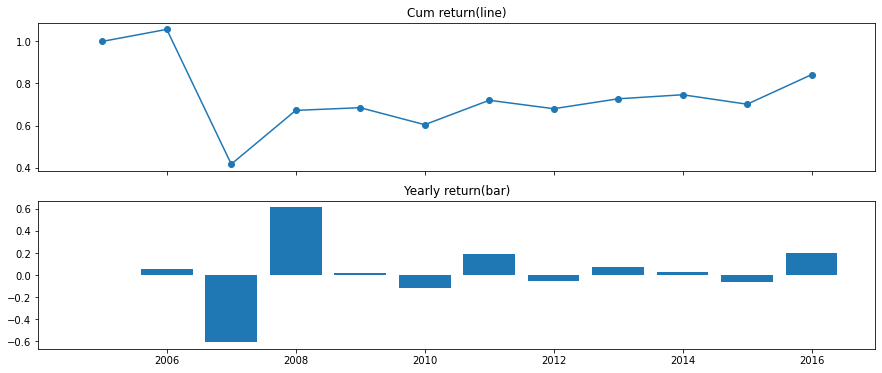

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(nrows=2, figsize=(15, 6), sharex=True)

axes[0].plot(cum_rtn_series.index, cum_rtn_series, marker='o');
axes[0].set_title("Cum return(line)");

axes[1].bar(rtn_series.index, rtn_series);
axes[1].set_title("Yearly return(bar)");

## 함수화

In [189]:
def get_return_series(selected_return_df):
    rtn_series = selected_return_df.mean(axis=1)
    rtn_series.loc[2005] = 0     # 주의: 영상속의 데이터와는 달리, 새로 업로드 된 데이터는 2006부터 존재하므로
                                 # 2004가 아니라 2005를 0으로 설정한 점에 주의해주세요
    rtn_series = rtn_series.sort_index()

    cum_rtn_series = (rtn_series + 1).cumprod().dropna()
    return rtn_series, cum_rtn_series

In [190]:
def plot_return(cum_rtn_series, rtn_series):
    fig, axes = plt.subplots(nrows=2, figsize=(15, 6), sharex=True)
    axes[0].plot(cum_rtn_series.index, cum_rtn_series, marker='o');
    axes[1].bar(rtn_series.index, rtn_series);
    axes[0].set_title("Cum return(line)");
    axes[1].set_title("Yearly return(bar)");

In [191]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)

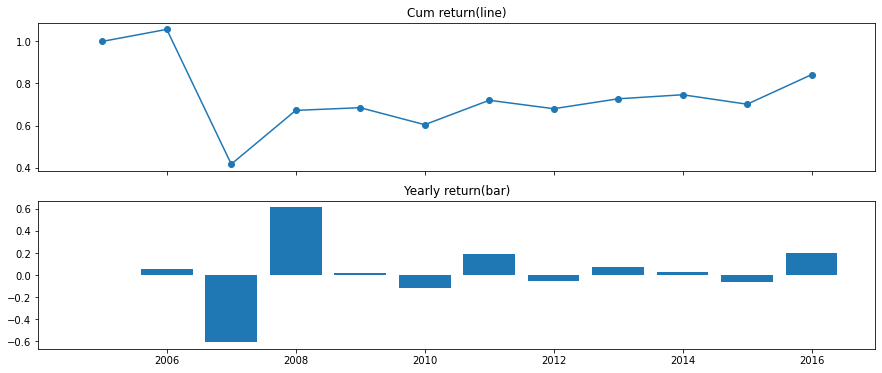

In [192]:
plot_return(cum_rtn_series, rtn_series)

## quantile (e.g. 상위 n% 종목 선정)

In [193]:
quantile_by_year_series = df.groupby(['year'])[indicator].quantile(0.9)
quantile_by_year_series
# ROA가 상위 10%인 수치를 가져온다.

year
2006   16.140
2007   14.320
2008   13.766
2009   14.034
2010   13.299
2011   15.505
2012   15.230
2013   12.290
2014   11.210
2015   10.725
2016   10.426
2017   11.450
Name: ROA, dtype: float64

In [194]:
quantilie_indicator_df = df.join(quantile_by_year_series, how="left", on="year",
                                 rsuffix="_quantile")
quantilie_indicator_df.head(2)

Code   Name  결산월             시가총액           유통시가총액    PER   PBR   PSR  \
0  A000020   동화약품   12 113122453500.000  65520525067.000 11.230 0.550 0.560   
1  A000040  KR모터스   12 144125742600.000 111855988832.000 97.070 1.440 0.820   

   P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT     DPS  year  수정주가     ROA  \
0                 4.390      3.480    4.390 600.000  2006  6460   3.810   
1                -7.780     16.840   40.670   0.000  2006  1098 -21.980   

         비유동부채          자산총계  ROA_quantile  
0 11961630.000 195293494.000        16.140  
1 28190608.000  81250312.000        16.140

In [195]:
quantilie_indicator_df = quantilie_indicator_df[
    quantilie_indicator_df[indicator] >= quantilie_indicator_df["{}_quantile".format(indicator)]
]
quantilie_indicator_df.head()

Code      Name  결산월               시가총액             유통시가총액    PER  \
29   A000660    SK하이닉스   12 14566846807500.000 12116703174479.000  8.670   
88   A001940  KISCO홀딩스   12   408000000000.000   137496000000.000  5.810   
121  A002670      미주제강   12    34808592000.000    23321756640.000  5.790   
219  A004790    렉스엘이앤지   12   166492972975.000   151658449083.000 32.930   
225  A004890      동일산업   12    62085504000.000    22350781440.000  3.190   

      PBR   PSR  P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT     DPS  year  \
29  2.540 2.740                48.430      5.840    9.830   0.000  2006   
88  0.710 0.950               194.980      2.280    2.570 750.000  2006   
121 0.200 0.060                -3.670      8.470   15.330   0.000  2006   
219 3.730 1.200               -79.250     19.020   26.380   0.000  2006   
225 0.580 0.220               -21.350      2.410    2.840 750.000  2006   

       수정주가    ROA          비유동부채           자산총계  ROA_quantile  
29    36450 22.330 2069482000.000 8255022000.000        16.140  
88    11563 17.320   11100119.000  702269703.000        16.140  
121     835 16.210   15349579.000   86224762.000        16.140  
219  261290 36.360    2098673.000   71388338.000        16.140  
225   21800 25.810   11484024.000  137442167.000        16.140

In [196]:
quantilie_indicator_df.groupby('year')['Code'].count()
# 각 년도별로 선별된 종목들

year
2006    147
2007    152
2008    158
2009    159
2010    159
2011    160
2012    164
2013    119
2014    158
2015    159
2016    168
2017    176
Name: Code, dtype: int64

In [197]:
indicator_df = quantilie_indicator_df.pivot(index='year', columns="Name", values=indicator)
asset_on_df = indicator_df.notna().astype(int).replace(0, np.nan)

In [198]:
selected_return_df = yearly_rtn_df * asset_on_df
selected_return_df.head()

# 2009년에 nan으로 바뀐거 자체가 look ahead bias이다.
# 상폐가 된것은 미래의 일이고 이를 이미 반영되있는 데이터로
# 테스팅에 적용이 된것임

Name  3S  3SOFT  3노드디지탈  AD모터스  AJS  AJ네트웍스  AJ렌터카  AK홀딩스  APS홀딩스  AP시스템  \
year                                                                       
2006 nan    nan     nan    nan  nan     nan    nan    nan  -0.113    nan   
2007 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   
2008 nan    nan     nan  2.734  nan     nan    nan    nan     nan    nan   
2009 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   
2010 nan    nan     nan    nan  nan     nan    nan    nan     nan    nan   

Name  AP우주통신  AP위성  BGF  BHK  BYC  C&S자산관리  C&우방  C&중공업  CJ  CJ CGV  CJ E&M  \
year                                                                          
2006     nan   nan  nan  nan  nan      nan   nan    nan nan  -0.397     nan   
2007     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2008     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2009     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   
2010     nan   nan  nan  nan  nan      nan   nan    nan nan     nan     nan   

Name  CJ대한통운  CJ씨푸드  CJ엔터테인  CJ오쇼핑  CJ인터넷  CJ제일제당  CJ프레시웨이  CJ헬로  CL  CMG제약  \
year                                                                          
2006     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2007     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2008     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2009     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   
2010     nan    nan     nan    nan    nan     nan      nan   nan nan    nan   

Name     CS  CSA 코스믹  CS홀딩스  CT&T   CU전자  DB  DB라이텍  DB하이텍    DMS  DRB동일  DSR  \
year                                                                            
2006 -0.377      nan    nan   nan -0.165 nan 10.734    nan  0.364    nan  nan   
2007 -0.593      nan    nan   nan    nan nan    nan    nan -0.420    nan  nan   
2008    nan      nan    nan   nan    nan nan    nan    nan    nan    nan  nan   
2009    nan      nan    nan   nan    nan nan    nan    nan    nan    nan  nan   
2010    nan      nan -0.449   nan    nan nan    nan    nan    nan    nan  nan   

Name  DSR제강  E1  EG    EMW  F&F  FnC코오롱  GBS  GH신소재    GKL  GK파워  GMR 머티리얼즈  \
year                                                                          
2006    nan nan nan -0.429  nan     nan  nan    nan    nan   nan        nan   
2007    nan nan nan -0.515  nan     nan  nan    nan    nan   nan        nan   
2008    nan nan nan    nan  nan     nan  nan    nan    nan   nan        nan   
2009    nan nan nan    nan  nan     nan  nan    nan    nan   nan        nan   
2010 -0.152 nan nan    nan  nan     nan  nan    nan -0.119   nan        nan   

Name  GRT  GS    GST  GS건설  GS글로벌  GS리테일  GS홈쇼핑  GT&T  H1바이오  HB테크놀러지  HRS  \
year                                                                         
2006  nan nan  0.081   nan    nan    nan    nan   nan    nan      nan  nan   
2007  nan nan -0.687   nan    nan    nan    nan   nan    nan      nan  nan   
2008  nan nan  0.701   nan    nan    nan    nan   nan    nan      nan  nan   
2009  nan nan  0.744   nan    nan    nan    nan   nan    nan      nan  nan   
2010  nan nan    nan   nan -0.404    nan    nan   nan    nan      nan  nan   

Name  IC코퍼레이션  IDH  IHQ   ISC  ITX엠투엠  JS  JW생명과학  JW신약  JW중외제약  JW홀딩스  \
year                                                                     
2006      nan  nan  nan   nan     nan nan     nan   nan     nan    nan   
2007      nan  nan  nan   nan     nan nan     nan   nan     nan    nan   
2008      nan  nan  nan 0.579     nan nan     nan   nan     nan    nan   
2009      nan  nan  nan   nan     nan nan     nan   nan     nan    nan   
2010      nan  nan  nan   nan  -0.378 nan     nan   nan     nan    nan   

Name  JYP Ent.  KB오토시스  KCC  KCC건설  KCI  KCTC  KCW  KC그린홀딩스  KC코트렐  KD건설  KEC  \
year                                                                            
2006     

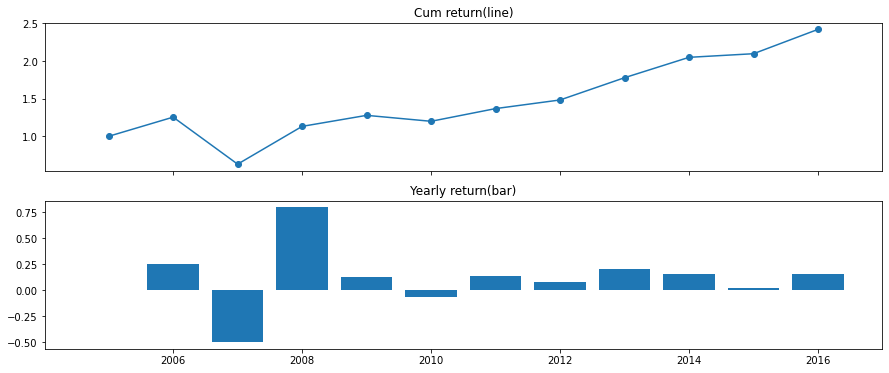

In [199]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)
plot_return(cum_rtn_series, rtn_series)

# 강환국님의 "할수있다 퀀트투자" 구현해보기

![](http://image.kyobobook.co.kr/images/book/large/392/l9791195887392.jpg)

## quantile + top10 
  

- Filter + Selector 패턴
    - Filter (후보)
        - e.g. 부채비율 0.5이상
        - 최종 포트폴리오 종목 갯수 선정에 직접적으로 영향 X
    - Selector (고르자)
        - 최종적으로 xx개의 종목이 선택의 기준이 되는 indicator
        - e.g. PBR이 0.2 이상인 회사 중에 가장 낮은 순으로 20~30개 매수

- zipline (https://github.com/quantopian/zipline)  
- 백테스팅 라이브러리이다. 관심있으면 써봐라.  
- 커스텀 어렵, 실제 트레이딩 적용 어렵

## [Chapter 6] 투자전략22. 소형주 + 저PBR 전략(200p)

- Filter
    - 소형주(시가총액 하위 20%)

- Select
    - PBR 0.2 이상
    - PBR이 가장 낮은 주식순으로 20~30개 매수

In [200]:
# 
# Filter
# 
market_cap_quantile_series = df.groupby("year")['시가총액'].quantile(.2)

filtered_df = df.join(market_cap_quantile_series, on="year", how="left", rsuffix="20%_quantile")
filtered_df = filtered_df[filtered_df['시가총액'] <= filtered_df['시가총액20%_quantile']]
filtered_df.head()

Code    Name  결산월            시가총액         유통시가총액     PER   PBR    PSR  \
21  A000440  중앙에너비스   12 15198600000.000 5828663100.000  12.560 0.370  0.170   
34  A000760    이화산업   12 11158000000.000 5161690800.000  -0.980 0.270  0.180   
40  A000910     유니온   12 19769831000.000 8811413677.000  22.400 0.320  0.370   
44  A001000    신라섬유   12 15450000000.000 8503680000.000 -53.000 1.680 14.950   
52  A001140      국보   12  9553927200.000 6067699165.000 258.790 0.550  0.140   

    P/FCF1(Adj., FY End)  EV/EBITDA  EV/EBIT     DPS  year  수정주가    ROA  \
21                15.080      7.600   10.190 800.000  2006  5234  3.470   
34                -9.360     -5.830   -5.530   0.000  2006  3965 -9.840   
40                 5.070      6.730   18.710 500.000  2006  1632  0.660   
44               -13.330    -72.110  -59.790   0.000  2006  1120  0.300   
52                 3.660      6.750   17.780   0.000  2006   800  0.870   

          비유동부채         자산총계  시가총액20%_quantile  
21  4359080.000 51819700.000   24661836580.000  
34  1457925.000 93661256.000   24661836580.000  
40  4516111.000 95440233.000   24661836580.000  
44 25672808.000 39723341.000   24661836580.000  
52 12534042.000 71494973.000   24661836580.000

In [201]:
#
# Selector
#
filtered_df = filtered_df[filtered_df['PBR'] >= 0.2]

smallest_pbr_series = filtered_df.groupby("year")['PBR'].nsmallest(15)
smallest_pbr_series

year       
2006  882     0.220
      359     0.250
      433     0.250
      1012    0.250
      341     0.260
               ... 
2017  18546   0.400
      18015   0.410
      18188   0.420
      18043   0.430
      18712   0.430
Name: PBR, Length: 180, dtype: float64

In [202]:
selected_index = smallest_pbr_series.index.get_level_values(1)

selector_df = filtered_df.loc[selected_index].pivot(
    index='year', columns="Name", values="PBR"
)
selector_df.head()

Name  CU전자  KD건설  SG충방  고려산업    광림    국동    국보  국일제지  금비  까뮤이앤씨  남성  남영비비안  \
year                                                                         
2006   nan 0.250   nan   nan   nan   nan   nan   nan nan    nan nan    nan   
2007   nan   nan 0.280   nan 0.330   nan   nan   nan nan    nan nan    nan   
2008   nan   nan   nan   nan   nan   nan 0.430   nan nan    nan nan    nan   
2009   nan   nan   nan   nan   nan 0.240 0.240   nan nan    nan nan    nan   
2010   nan   nan   nan 0.300   nan   nan   nan   nan nan    nan nan    nan   

Name  남한제지  네오퍼플  대동기어  대동전자  대림B&Co  대림제지  대양글로벌  대양제지  대한방직  대한은박지  동국실업  \
year                                                                         
2006   nan 0.260 0.250 0.260     nan   nan    nan   nan   nan  0.280 0.270   
2007 0.360   nan   nan 0.330     nan   nan    nan   nan   nan    nan   nan   
2008   nan 0.260   nan   nan     nan   nan    nan   nan   nan    nan   nan   
2009   nan   nan   nan   nan     nan   nan    nan   nan   nan    nan   nan   
2010   nan   nan   nan   nan     nan   nan  0.270   nan   nan    nan   nan   

Name  동일제강  디에스티  디에이치패션   레이젠  마이스코  마이크로닉스  맥스브로  모아텍  미주제강    백산  보루네오  \
year                                                                        
2006   nan   nan     nan   nan   nan     nan   nan  nan   nan   nan   nan   
2007   nan 0.320     nan   nan   nan     nan   nan  nan   nan   nan   nan   
2008   nan 0.340     nan   nan   nan   0.390   nan  nan   nan   nan   nan   
2009   nan   nan   0.210 0.220   nan     nan   nan  nan   nan 0.220   nan   
2010   nan   nan   0.280   nan   nan     nan   nan  nan   nan   nan   nan   

Name  블루젬디앤씨  삼보판지  삼아알미늄  삼호  서원    성안  성지건설    세동  세원물산  세진티에스  신풍제지  신한  \
year                                                                         
2006     nan 0.290    nan nan nan 0.250   nan   nan   nan    nan   nan nan   
2007     nan   nan  0.330 nan nan 0.340   nan   nan   nan    nan   nan nan   
2008     nan   nan    nan nan nan 0.310   nan   nan   nan    nan   nan nan   
2009     nan   nan    nan nan nan   nan   nan 0.200   nan    nan   nan nan   
2010   0.290   nan    nan nan nan   nan 0.260   nan   nan    nan   nan nan   

Name  씨아이테크  아이즈비전  아이팩토리  어울림 네트  어울림엘시스  어울림정보   에스넷  에스아이리소스  에스앤더블류  \
year                                                                      
2006    nan    nan    nan     nan     nan    nan   nan      nan     nan   
2007    nan    nan    nan   0.280   0.200    nan   nan      nan     nan   
2008    nan    nan    nan   0.200     nan  0.200 0.400      nan     nan   
2009  0.220    nan    nan   0.230     nan    nan 0.240      nan     nan   
2010    nan    nan    nan     nan   0.210  0.220   nan    0.250     nan   

Name  에이스일렉  에피밸리  영신금속  완리  우진플라임    원림  웨스테이트   유니온  유성티엔에스  유신  유씨아이  유아이엘  \
year                                                                            
2006    nan   nan   nan nan    nan   nan  0.300 0.320     nan nan   nan   nan   
2007    nan   nan   nan nan    nan 0.320    nan   nan   0.340 nan   nan   nan   
2008    nan   nan   nan nan    nan   nan    nan   nan     nan nan   nan   nan   
2009    nan   nan   nan nan    nan   nan    nan   nan     nan nan 0.200   nan   
2010  0.250   nan   nan nan  0.290   nan    nan   nan     nan nan   nan   nan   

Name  이건홀딩스   이앤텍   이젠텍  이화산업  인화정공  일성건설  일정실업  제일제강  제일테크노스  조이토토  중앙건설  \
year                                                                        
2006    nan   nan   nan 0.270   nan   nan   nan   nan     nan   nan   nan   
2007    nan   nan   nan   nan   nan   nan   nan   nan     nan   nan   nan   
2008    nan 0.260   nan   nan   nan   nan   nan   nan     nan 0.280   nan   
2009    nan   nan   nan   nan   nan   nan   nan   nan     nan   nan   nan   
2010    nan   nan 0.240   nan   nan   nan 0.290 0.280     nan   nan   nan   

Name    진도  진양산업  진양폴리  청호컴넷  케이에스피   케이엠  케이프  큐로홀딩스  큐리어스  태양금속  태평양물산  토필드  \
year                                                                            
2006   nan   nan   nan 

In [203]:
asset_on_df = selector_df.notna().astype(int).replace(0, np.nan)
selected_return_df = yearly_rtn_df * asset_on_df

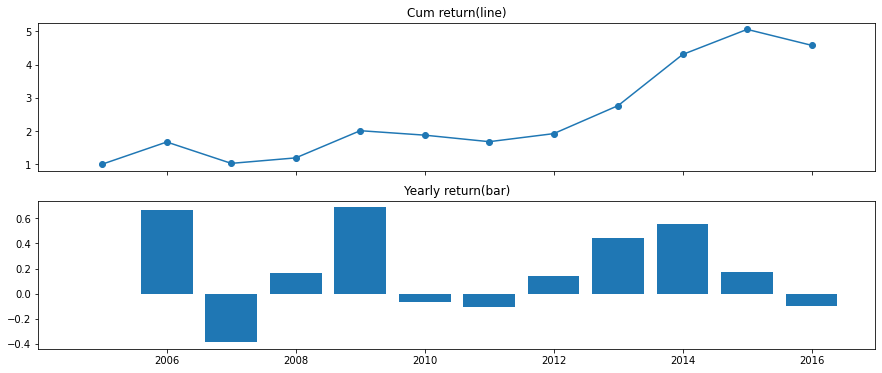

In [204]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)
plot_return(cum_rtn_series, rtn_series)

## [Chapter 5] 투자전략20. 그레이엄의 마지막선물 업그레이드(188p)

- Filter
    - ROA 5% 이상
    - 부채비율 50% 이하
- Select
    - (PBR 0.2 이상)
    - PBR 낮은기업 20~30개 매수

In [205]:
#
# Filter
#

# ROA >= 0.05
filtered_df = df[df['ROA'] >= 0.05]

# 부채비율 <= 0.5
filtered_df['부채비율'] = filtered_df['비유동부채'] / filtered_df['자산총계']
filtered_df = filtered_df[filtered_df['부채비율'] <= 0.5]

In [206]:
#
# Selector(위의 투자전략22 것 그대로)
#
filtered_df = filtered_df[filtered_df['PBR'] >= 0.2]

smallest_pbr_series = filtered_df.groupby("year")['PBR'].nsmallest(15)
selected_index = smallest_pbr_series.index.get_level_values(1)

selector_df = filtered_df.loc[selected_index].pivot(
    index='year', columns="Name", values="PBR"
)

In [207]:
asset_on_df = selector_df.notna().astype(int).replace(0, np.nan)
selected_return_df = yearly_rtn_df * asset_on_df

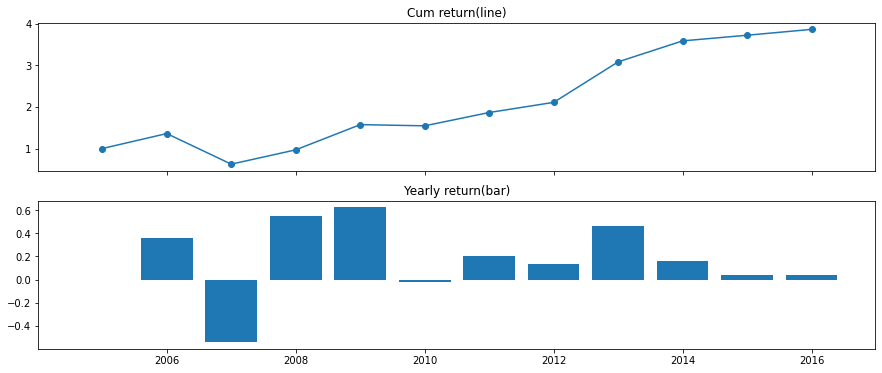

In [208]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)
plot_return(cum_rtn_series, rtn_series)
# 주의 - 1년 스케일이라서 거의 직선으로 이어진다.
# 주의 - 상폐 등의 look ahead bias가 있음
# 주의 - 장기적으로 봤을땐 우상향, 5년 이상급이다. 어플지우고 존버

## [Chapter 8] 투자전략24. 슈퍼가치전략(246p)

- Filter
    - 시가총액 하위 20%
- Selector
    - PBR, PCR, PER, PSR 순위를 매김
    - 각 순위를 sum을 해서 통합순위를 구함
    - 통합순위가 가장 높은 종목 50개 매수

In [209]:
#
# Filter
#
market_cap_quantile_series = df.groupby("year")['시가총액'].quantile(.2)
filtered_df = df.join(market_cap_quantile_series, on="year", how="left", rsuffix="20%_quantile")
filtered_df = filtered_df[filtered_df['시가총액'] <= filtered_df['시가총액20%_quantile']]

In [210]:
pd.Series([100, 1, 1, 3]).rank(method="max")
pd.Series([100, 1, 1, 3]).rank(method="min")

0   4.000
1   2.000
2   2.000
3   3.000
dtype: float64

0   4.000
1   1.000
2   1.000
3   3.000
dtype: float64

In [211]:
pbr_rank_series = filtered_df.groupby("year")['PBR'].rank(method="max")
per_rank_series = filtered_df.groupby("year")['PER'].rank(method="max")
psr_rank_series = filtered_df.groupby("year")['PSR'].rank(method="max")

In [212]:
psr_rank_series.head()

21    39.000
34    43.000
40   119.000
44   292.000
52    29.000
Name: PSR, dtype: float64

In [213]:
psr_rank_series.sort_values().dropna().head()

500     1.000
16447   1.000
9629    1.000
8849    1.000
19186   1.000
Name: PSR, dtype: float64

In [214]:
filtered_df = filtered_df.join(pbr_rank_series, how="left", rsuffix="_rank")
filtered_df = filtered_df.join(per_rank_series, how="left", rsuffix="_rank")
filtered_df = filtered_df.join(psr_rank_series, how="left", rsuffix="_rank")

In [215]:
filtered_df['PBR_rank'].isna().sum()

10

- 어떻게 각 rank column의 nan을 메꿔야할까?

In [216]:
filtered_df.filter(like="rank").columns

Index(['PBR_rank', 'PER_rank', 'PSR_rank'], dtype='object')

In [217]:
#
# 주의: 종목을 선택하는 로직ㅇ[ 따라, '가장 작은 rank'로 부여하는게 타당할 수도 있고, '가장 큰 rank'로 부여하는 것이 타당할 수도 있습니다.
# 예를들어, PER이 작을수록 종목 선정에 우선 순위가 있도록 할 예정이고, PER이 작을수록 rank값이 작도록 설정했다면,
# PER이 nan인 종목들은 PER rank가 가장 큰 값(혹은 그 값보다 +1인 값)으로 메꿔져야 penalty를 받을 수 있습니다.
#

# 1. 0으로 메꾸는 법
filtered_df.loc[:, filtered_df.filter(like="rank").columns] = filtered_df.filter(like="rank").fillna(0)

# 2. 각 rank별 max 값 (혹은 그것보다 1 큰 값)으로 메꾸는 법
# filtered_df['PBR_rank'] = filtered_df['PBR_rank'].fillna(filtered_df['PBR_rank'].max() + 1)
# filtered_df['PER_rank'] = filtered_df['PER_rank'].fillna(filtered_df['PER_rank'].max() + 1)
# filtered_df['PSR_rank'] = filtered_df['PSR_rank'].fillna(filtered_df['PSR_rank'].max() + 1)

In [218]:
filtered_df['rank_sum'] = filtered_df.filter(like="_rank").sum(axis=1)

In [219]:
#
# Selector
#
max_rank_series = filtered_df.groupby("year")['rank_sum'].nlargest(15)
selected_index = max_rank_series.index.get_level_values(1)

selector_df = filtered_df.loc[selected_index].pivot(
    index='year', columns="Name", values="rank_sum"
)

In [220]:
asset_on_df = selector_df.notna().astype(int).replace(0, np.nan)
selected_return_df = yearly_rtn_df * asset_on_df

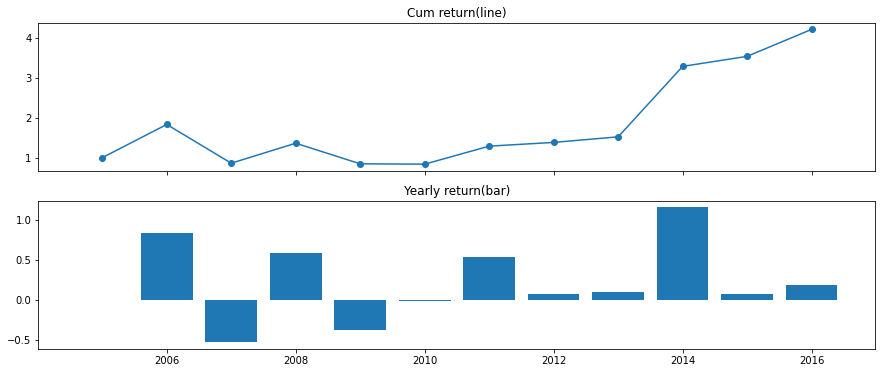

In [221]:
rtn_series, cum_rtn_series = get_return_series(selected_return_df)
plot_return(cum_rtn_series, rtn_series)

# 재무제표 기반 실전 프로젝트의 한계

- **(중요)Look ahead bias & Survivalship bias**
    - 특정 년도에 상장이 폐지가 되었다면 -> 바로 이전 년도에서 종목선정에 고려가 안됨
    - 즉, 이미 상장 폐지 정보를 미래 시점에서 확인하고, 해당 년도의 수익률을 nan으로 미리 메꾸어 버림

- bias를 제거하기 위해 상폐 데이터도 넣고, 이런 종목을 고르기도 해야함(현재시점의판단하에)  

- Data availability(time alignment) 가용성  
    - 각 투자지표의 값들이 공시 되는 시기
        - 년도별, 분기별
    - 정확한 상장폐지 날짜?
- Data acquisition (how획득?)  
    - 고정된 과거데이터로만 테스트 하면 안됨 -> 계속 새로운 데이터에 대한 갱신 필요
    - 크롤링, 증권사 API, 유료 데이터 벤더 등  
    - n빵해서 유로데이터 구매하는 경우도 있다.ㅜㅜ  
- Data의 무결성
    - 아무리 증권사 API나 유로 벤더를 통해서 받아온 데이터라도, 문제가 있는 경우가 많음
    - 예를 들어, 일봉 OHLC -> C가 H보다 더 큰 경우 / 배당락, 주식분할 등의 이벤트가 제대로 반영이 안된 경우 등
    - 데이터의 결함, nunique==1, 비이상적인 값 등에 대한 EDA 필요
    - 면접eg) 데이터를 던지고 어떻게 관찰하는지 봤다.
- 데이터가 년도별로만 존재하기 때문에, 1년에 한번 수익률이 찍혀서 변동성, MDD를 제대로 파악하기 어려움
    - MDD(전 고점대비 떨어진것, 맥스 드로우다운)
    - 코로나 이벤트 등 반영이 없음
- 거래세, 수수료 반영 X
    - 정확한 asset turnover 고려가 안됨
    - 슬립핏? 30만원에 100주를 사고싶은데 35만원뿐 이런경우는 단타가 될수록 영향이 커진다.   
- 기타 위 실전예제에서의 한계
    - 데이터의 cleaning, validation 필요
    - Missing value에 대한 전처리 필요
    - 주어진 데이터 존재하지 않는 지표(column)은 다른 지표로 대체한 점

- 위 사항들을 어떻게든 해결하면 괜찮은 실전투자알고리즘 이다.
- 리얼초보는 이런 문제점을 인지조차 못하는 경우가 많다.

# 혼자 진행해보면 좋을 것들 

- `transform()`, `apply()` 함수 등을 구글링해서 독학해보기
- OOP 방식으로 구현해보기(확장성 있는 코드화)

In [222]:
# OOP의 예시
# 필터 리스트에 인디케이터 생성자를 주고
# 설렉터 생성자도 준다.
# 백테스트 모듈로 이를 받아서 run 하면 결과를 나오게끔 (결과DF,그래프,CSV저장 등)

# filter_list = [
#     ColumnIndicator("부채비율", 0.5, lower_than=False),
#     ColumnIndicator("ROE", 0.5, lower_than=True),
# ]
# selector = Selector("PBR", 20, lowest=True)

# backtest = Backtest(filter_list, selector, yearly_rtn_df)
# backtest.run()

NameError: ignored

- 거래비용 주기

In [ ]:
# 수수료, 슬립핏 등 보정
for_positive_df = (yearly_rtn_df > 0).astype(int) * 0.99
for_negative_df = (yearly_rtn_df < 0).astype(int) * 1.01

# ??
extra_fee_considered_weight_df = for_positive_df + for_negative_df
yearly_rtn_df = yearly_rtn_df * extra_fee_considered_weight_df

- weight??
    - 지금까지는 종목 선택 후, 다 동일가중 투자(`mean()`만으로 평균수익률을 구할 수 있었음)
    - e.g. ROA의 비중만큼 넣기 
        - Top n개의 종목을 산출 후, 각각의 값을 1,0(nan)으로 변환하기 전에, `selector_df`를 sum(axis=1)로 나눠주기 등

- 분기별 데이터 & 리벨런싱 